In [107]:
import csv
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [113]:
dir(sklearn.pipeline.Pipeline)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_estimator_type',
 '_final_estimator',
 '_fit',
 '_get_param_names',
 '_get_params',
 '_inverse_transform',
 '_pairwise',
 '_replace_estimator',
 '_set_params',
 '_transform',
 '_validate_names',
 '_validate_steps',
 'classes_',
 'decision_function',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inverse_transform',
 'named_steps',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'score',
 'set_params',
 'transform']

In [20]:
chi_data = pd.read_csv('chi_data.csv')

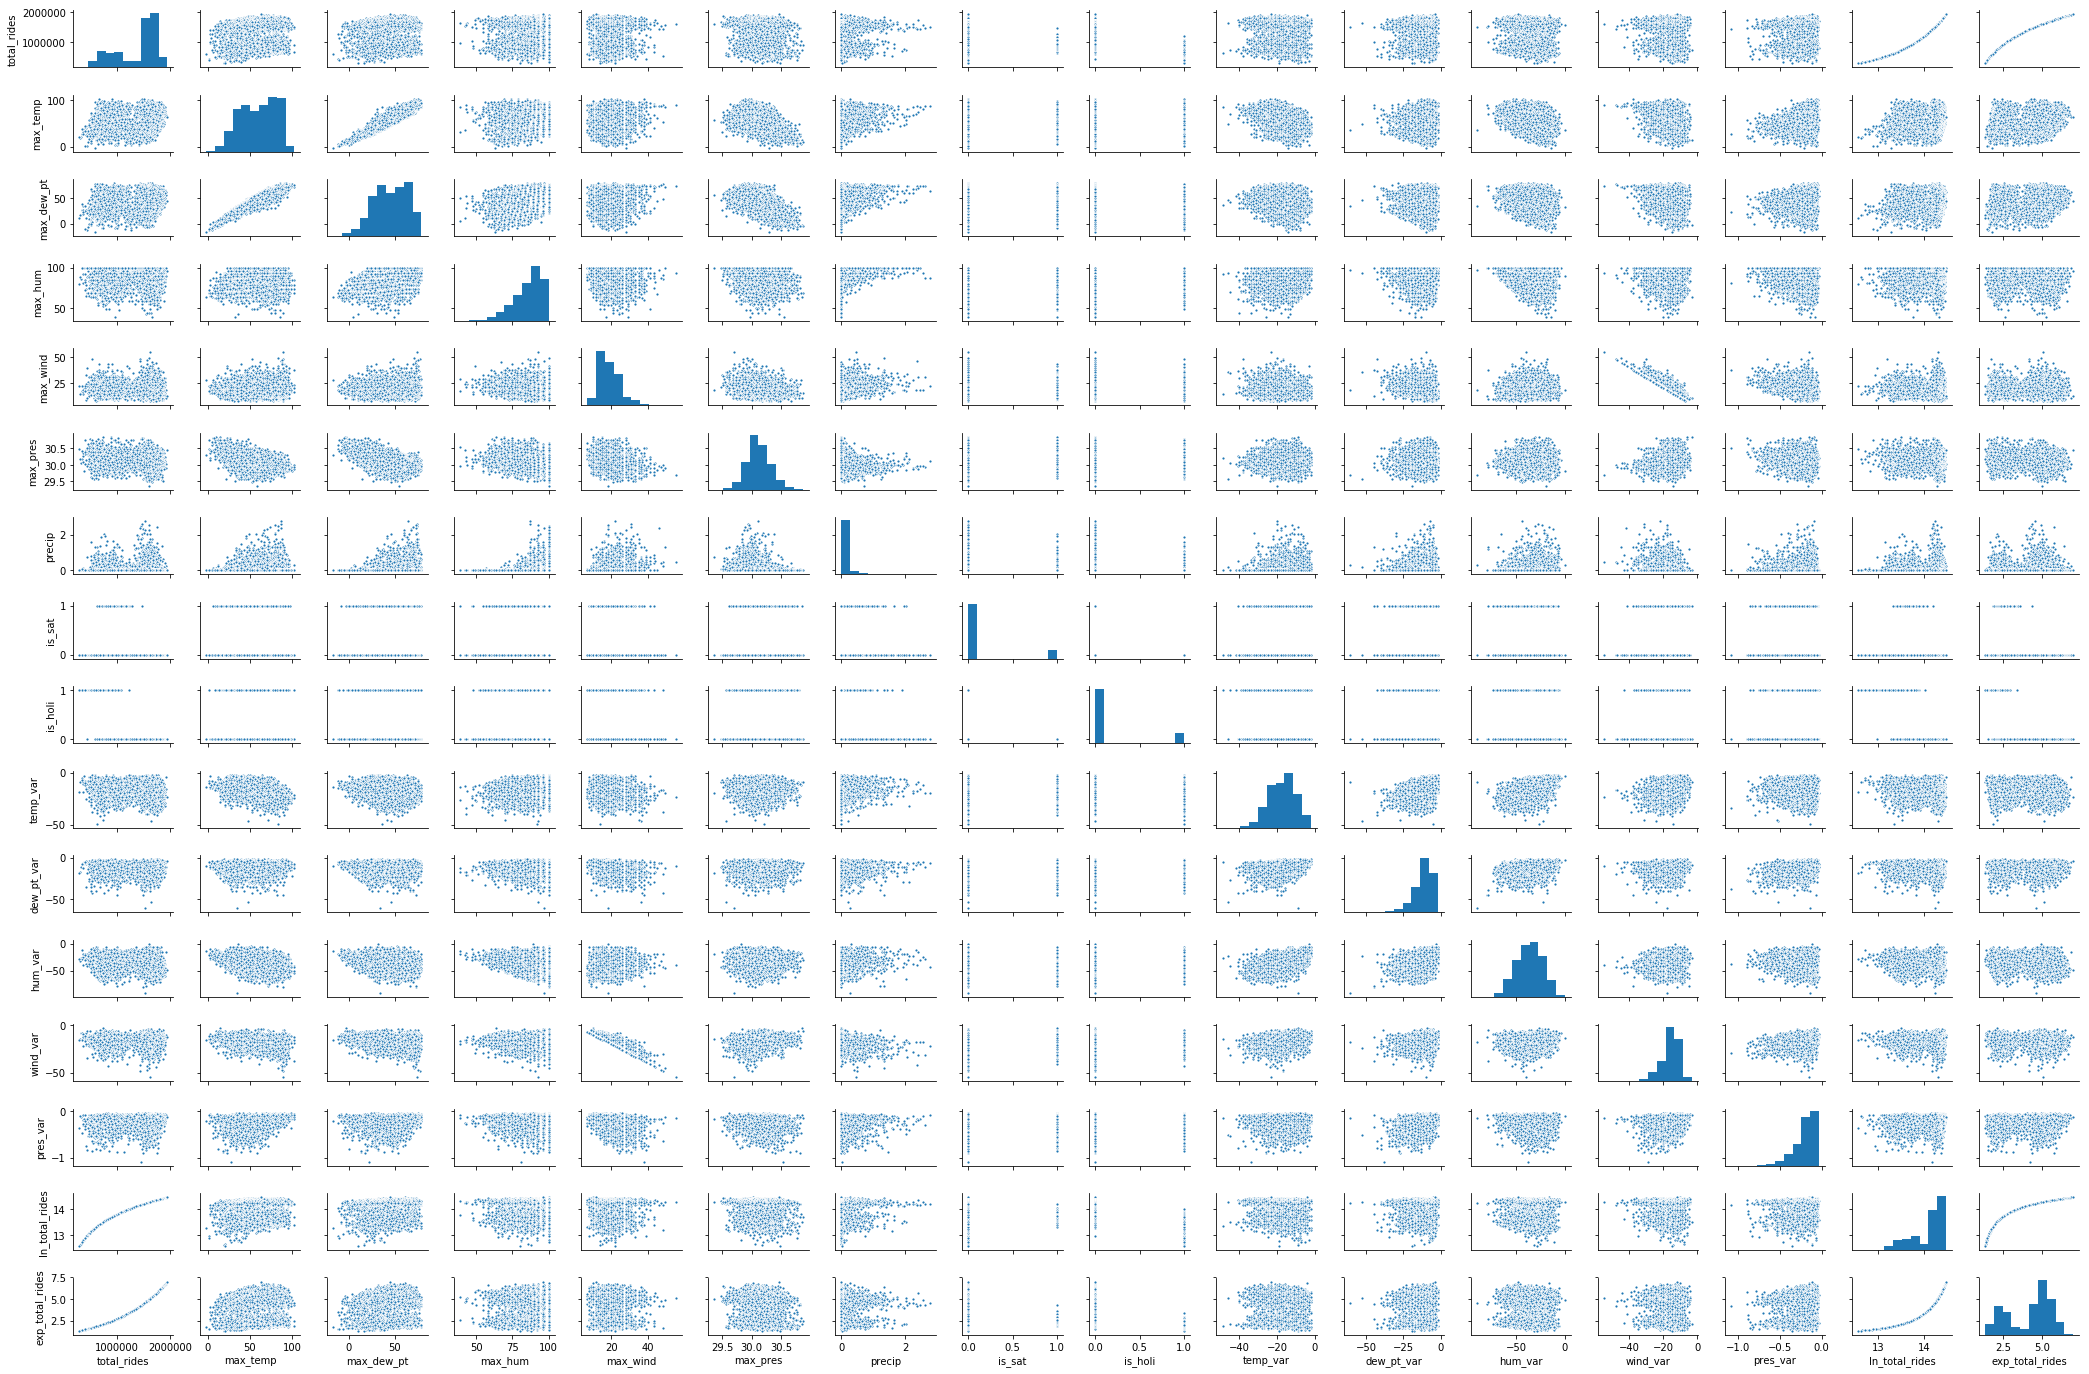

In [105]:
sns.pairplot(chi_data, height=1.2, aspect=1.5, markers='.');

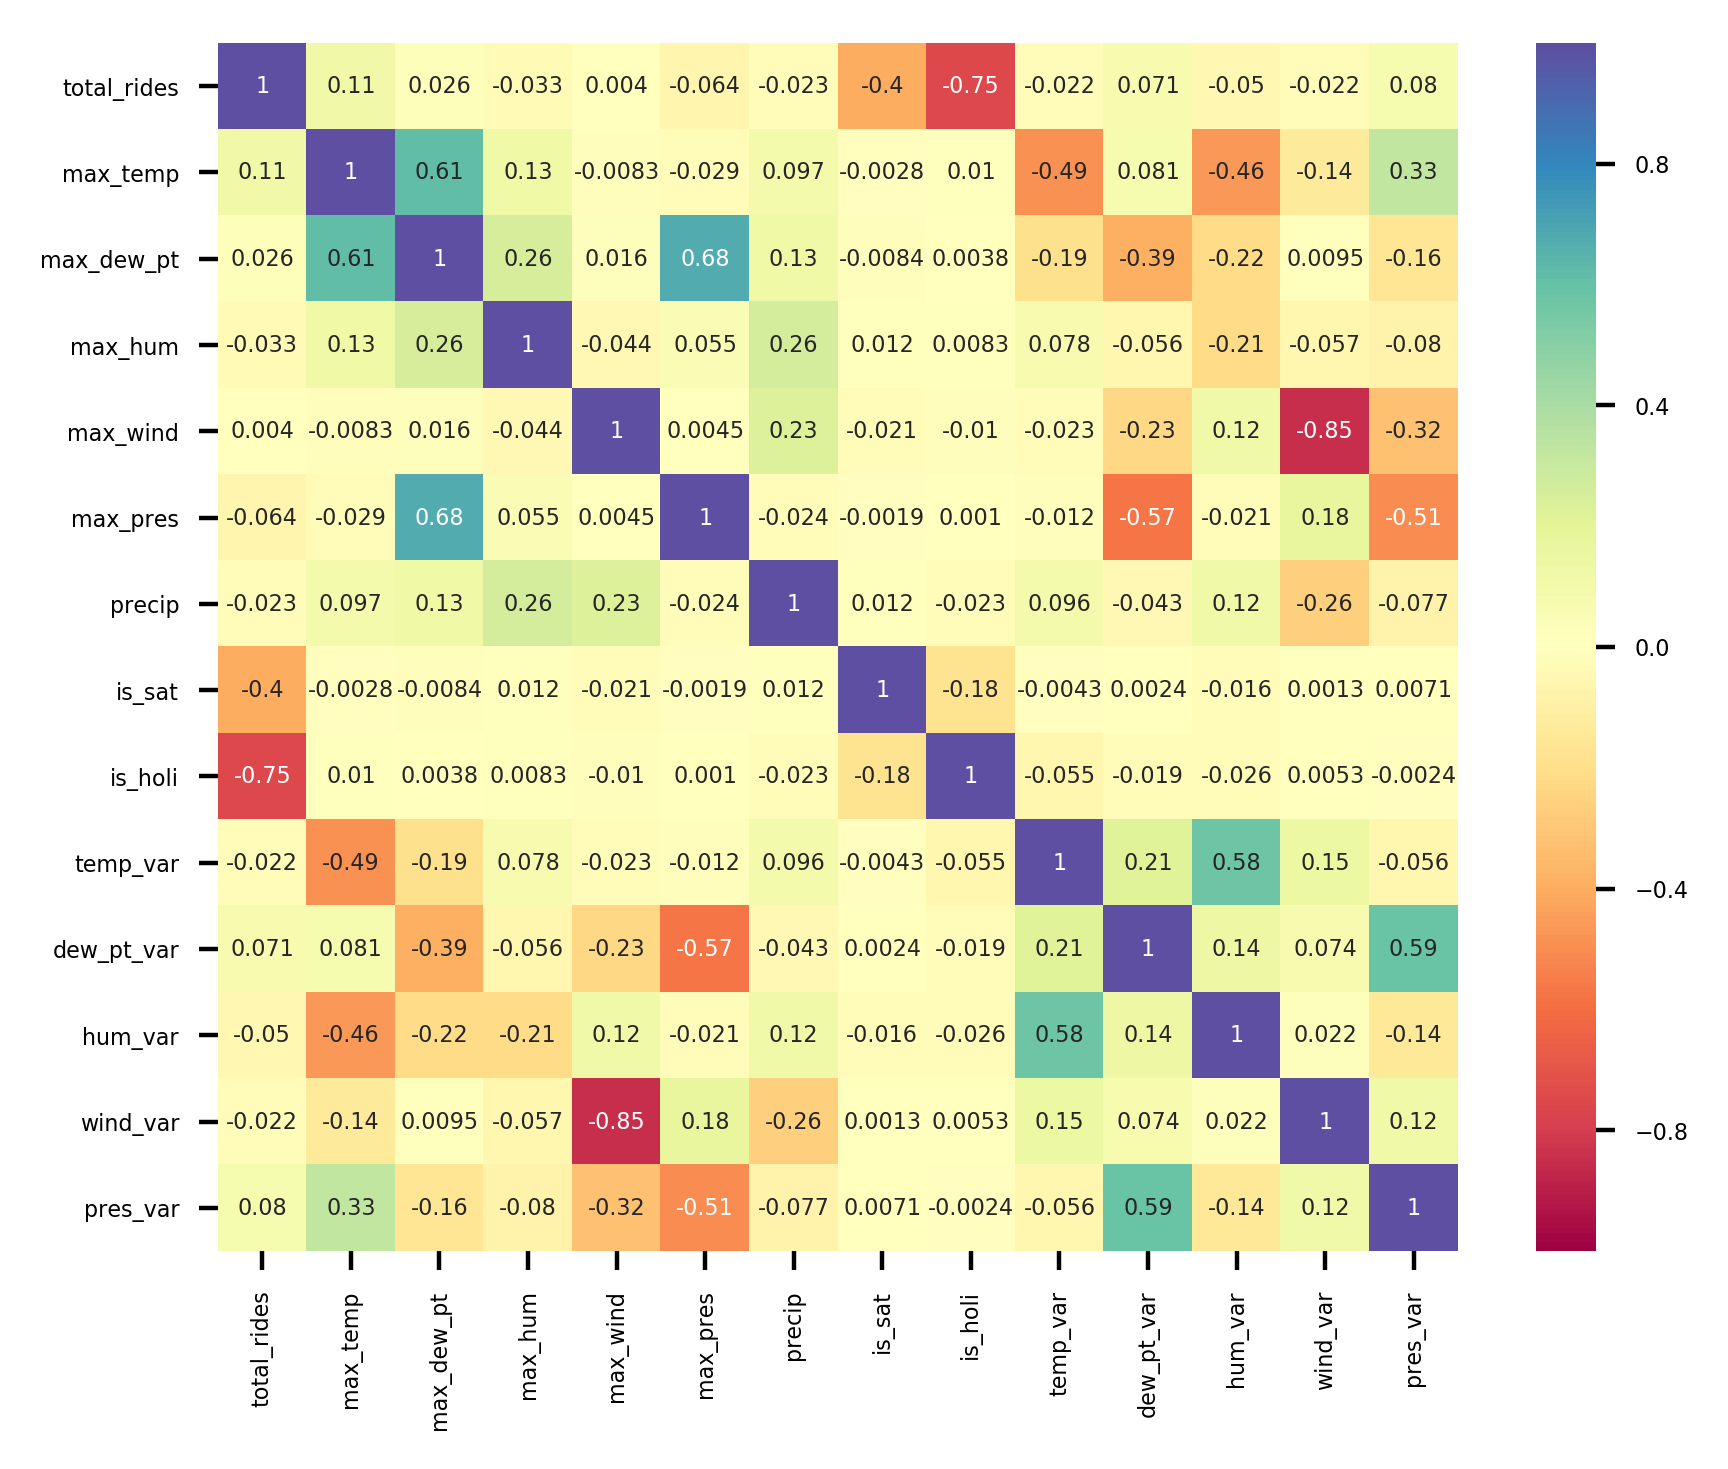

In [22]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (5, 4)
rcParams['figure.dpi'] = 400
rcParams['font.size'] = 4
sns.heatmap(chi_data.corr(), cmap="Spectral", annot=True, vmin=-1, vmax=1);

In [23]:
sorted(list(chi_data['max_wind'].unique()))

[0.0,
 7.0,
 8.0,
 9.0,
 10.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 55.0,
 81.0,
 125.0]

In [24]:
chi_data.drop(chi_data[chi_data['max_pres'] < 25].index, inplace=True)
chi_data['max_pres'].value_counts()

30.09    146
30.06    138
30.12    137
30.01    133
30.17    123
30.04    122
29.99    118
30.07    115
30.14    114
30.08    114
30.02    111
30.11    108
30.13    108
30.22    108
30.05    107
30.10    105
29.96    104
30.15    102
30.03     99
30.19     98
30.27     97
30.18     91
29.98     91
30.25     89
30.00     88
30.16     88
29.97     87
29.94     84
29.93     79
30.32     77
        ... 
30.58      5
29.57      5
30.69      5
29.66      4
29.64      4
29.60      3
30.70      3
30.75      3
30.64      3
30.73      3
30.67      3
30.65      3
30.80      2
30.78      2
29.56      2
30.62      2
30.82      2
30.77      2
29.54      2
29.63      2
29.52      2
30.86      1
29.51      1
29.37      1
30.81      1
30.83      1
29.55      1
30.85      1
29.50      1
29.49      1
Name: max_pres, Length: 134, dtype: int64

In [25]:
chi_data.drop(chi_data[chi_data['max_hum'] < 10].index, inplace=True)
chi_data['max_hum'].value_counts()

100.0    800
93.0     641
92.0     334
84.0     229
89.0     215
90.0     210
85.0     207
87.0     189
96.0     188
86.0     172
78.0     154
81.0     141
82.0     138
83.0     134
97.0     131
80.0     130
76.0     110
88.0     109
75.0     104
79.0     101
77.0      93
70.0      91
73.0      81
69.0      81
74.0      67
94.0      64
72.0      55
68.0      50
71.0      48
67.0      47
91.0      35
64.0      31
65.0      26
66.0      23
62.0      23
63.0      22
60.0      16
58.0      15
61.0      15
59.0      15
55.0       8
56.0       5
57.0       4
47.0       3
95.0       3
48.0       2
52.0       2
50.0       2
53.0       2
49.0       2
54.0       2
39.0       2
43.0       2
44.0       1
51.0       1
42.0       1
Name: max_hum, dtype: int64

In [26]:
chi_data.drop(chi_data[chi_data['max_wind'] > 70].index, inplace=True)
chi_data['max_wind'].value_counts()

14.0    445
16.0    439
15.0    438
17.0    420
18.0    417
20.0    374
13.0    364
21.0    324
22.0    301
23.0    251
12.0    243
24.0    210
25.0    177
26.0    161
10.0    142
28.0    137
29.0     95
9.0      80
30.0     75
31.0     67
32.0     46
33.0     38
8.0      23
36.0     22
35.0     21
37.0     14
38.0     13
39.0      7
7.0       6
41.0      6
43.0      5
40.0      2
48.0      2
34.0      2
27.0      2
55.0      1
44.0      1
49.0      1
47.0      1
46.0      1
45.0      1
Name: max_wind, dtype: int64

In [27]:
chi_data.drop(chi_data[chi_data['precip'] > 3].index, inplace=True)
chi_data['precip'].value_counts()

0.00    3522
0.01     239
0.02     154
0.03      86
0.04      65
0.07      58
0.05      55
0.06      55
0.08      46
0.12      43
0.09      42
0.13      40
0.10      33
0.20      32
0.16      29
0.18      28
0.14      27
0.19      26
0.15      26
0.17      25
0.11      22
0.31      20
0.30      20
0.29      19
0.21      18
0.24      18
0.23      17
0.28      17
0.27      16
0.39      16
        ... 
1.25       1
2.41       1
1.48       1
1.84       1
2.02       1
1.39       1
0.97       1
1.13       1
2.10       1
1.96       1
1.88       1
1.24       1
1.54       1
2.76       1
2.56       1
1.05       1
1.95       1
0.88       1
0.99       1
2.32       1
1.94       1
1.63       1
0.72       1
1.10       1
1.19       1
2.35       1
1.65       1
0.89       1
2.60       1
1.37       1
Name: precip, Length: 164, dtype: int64

In [28]:
newcol = np.log(chi_data['total_rides'])
chi_data = chi_data.assign(ln_total_rides=newcol)

In [29]:
newcol2 = np.exp(chi_data['total_rides']/1e6)
chi_data = chi_data.assign(exp_total_rides=newcol2)

In [30]:
#sns.pairplot(chi_data, height=1.2, aspect=1.5, markers='.');

In [31]:
chi_data

Unnamed: 0  total_rides  max_temp  max_dew_pt  max_hum  \
0     2001-07-01 00:00:00       706369      78.0        68.0     84.0   
1     2001-07-02 00:00:00      1586646      78.0        49.0     77.0   
2     2001-07-03 00:00:00      1817879      79.0        68.0     97.0   
3     2001-07-04 00:00:00       767555      88.0        68.0     93.0   
4     2001-07-05 00:00:00      1525074      73.0        53.0     80.0   
5     2001-07-06 00:00:00      1601976      81.0        67.0     83.0   
6     2001-07-07 00:00:00       946546      86.0        79.0     97.0   
7     2001-07-08 00:00:00       695721      89.0        75.0    100.0   
8     2001-07-09 00:00:00      1533175      91.0        74.0    100.0   
9     2001-07-10 00:00:00      1547135      93.0        69.0     87.0   
10    2001-07-11 00:00:00      1575069      78.0        54.0     72.0   
11    2001-07-12 00:00:00      1585787      80.0        56.0     83.0   
12    2001-07-13 00:00:00      1598341      79.0        57.0     83.0   
13    2001-07-14 00:00:00       963025      87.0        54.0     61.0   
14    2001-07-15 00:00:00       661964      88.0        61.0     81.0   
15    2001-07-16 00:00:00      1503906      86.0        64.0     90.0   
16    2001-07-17 00:00:00      1546190      86.0        75.0    100.0   
17    2001-07-18 00:00:00      1548192      84.0        75.0    100.0   
18    2001-07-19 00:00:00      1568142      88.0        74.0    100.0   
19    2001-07-20 00:00:00      1548559      93.0        76.0    100.0   
20    2001-07-21 00:00:00       899002      93.0        76.0     94.0   
21    2001-07-22 00:00:00       580239      95.0        78.0    100.0   
22    2001-07-23 00:00:00      1429003      91.0        79.0     97.0   
23    2001-07-24 00:00:00      1569886      90.0        75.0    100.0   
24    2001-07-25 00:00:00      1487323      75.0        72.0    100.0   
25    2001-07-26 00:00:00      1591522      78.0        68.0     94.0   
26    2001-07-27 00:00:00      1568109      78.0        64.0     84.0   
27    2001-07-28 00:00:00       965043      78.0        72.0    100.0   
28    2001-07-29 00:00:00       668950      90.0        74.0    100.0   
29    2001-07-30 00:00:00      1494448      90.0        73.0    100.0   
...                   ...          ...       ...         ...      ...   
6239  2018-05-30 00:00:00      1510234      86.0        70.0     93.0   
6240  2018-05-31 00:00:00      1573050      89.0        68.0     90.0   
6241  2018-06-01 00:00:00      1624869      76.0        65.0     84.0   
6242  2018-06-02 00:00:00       933303      70.0        59.0     84.0   
6243  2018-06-03 00:00:00       726096      78.0        58.0     90.0   
6244  2018-06-04 00:00:00      1547222      80.0        50.0     77.0   
6245  2018-06-05 00:00:00      1604831      72.0        53.0     64.0   
6246  2018-06-06 00:00:00      1598684      79.0        58.0     80.0   
6247  2018-06-07 00:00:00      1620210      81.0        58.0     73.0   
6248  2018-06-08 00:00:00      1545893      73.0        58.0     72.0   
6249  2018-06-09 00:00:00       939454      82.0        65.0     93.0   
6250  2018-06-10 00:00:00       671429      71.0        66.0    100.0   
6251  2018-06-11 00:00:00      1505812      70.0        63.0     93.0   
6252  2018-06-12 00:00:00      1557538      80.0        69.0     93.0   
6253  2018-06-13 00:00:00      1543786      81.0        68.0     97.0   
6254  2018-06-14 00:00:00      1550425      81.0        54.0     67.0   
6255  2018-06-15 00:00:00      1510839      89.0        68.0     68.0   
6256  2018-06-16 00:00:00       914206      92.0        71.0     97.0   
6257  2018-06-17 00:00:00       676689      93.0        72.0     74.0   
6258  2018-06-18 00:00:00      1465430      95.0        72.0     87.0   
6259  2018-06-19 00:00:00      1547623      81.0        69.0     93.0   
6260  2018-06-20 00:00:00      1504766      77.0        64.0     87.0   
6261  2018-06-21 00:00:00      1312162      67.0        64.0     93.0   


In [32]:
chi_data['exp_total_rides']

0       2.026619
1       4.887329
2       6.158782
3       2.154492
4       4.595484
5       4.962829
6       2.576794
7       2.005154
8       4.632863
9       4.697991
10      4.831075
11      4.883133
12      4.944822
13      2.619609
14      1.938596
15      4.499229
16      4.693554
17      4.702960
18      4.797726
19      4.704686
20      2.457150
21      1.786465
22      4.174535
23      4.806100
24      4.425233
25      4.911218
26      4.797567
27      2.624901
28      1.952186
29      4.456876
          ...   
6239    4.527790
6240    4.821331
6241    5.077754
6242    2.542895
6243    2.066995
6244    4.698400
6245    4.977018
6246    4.946519
6247    5.054152
6248    4.692160
6249    2.558584
6250    1.957032
6251    4.507812
6252    4.747119
6253    4.682284
6254    4.713473
6255    4.530530
6256    2.494794
6257    1.967353
6258    4.329404
6259    4.700284
6260    4.503100
6261    3.714195
6262    3.891470
6263    2.559992
6264    2.454249
6265    4.223998
6266    4.1893

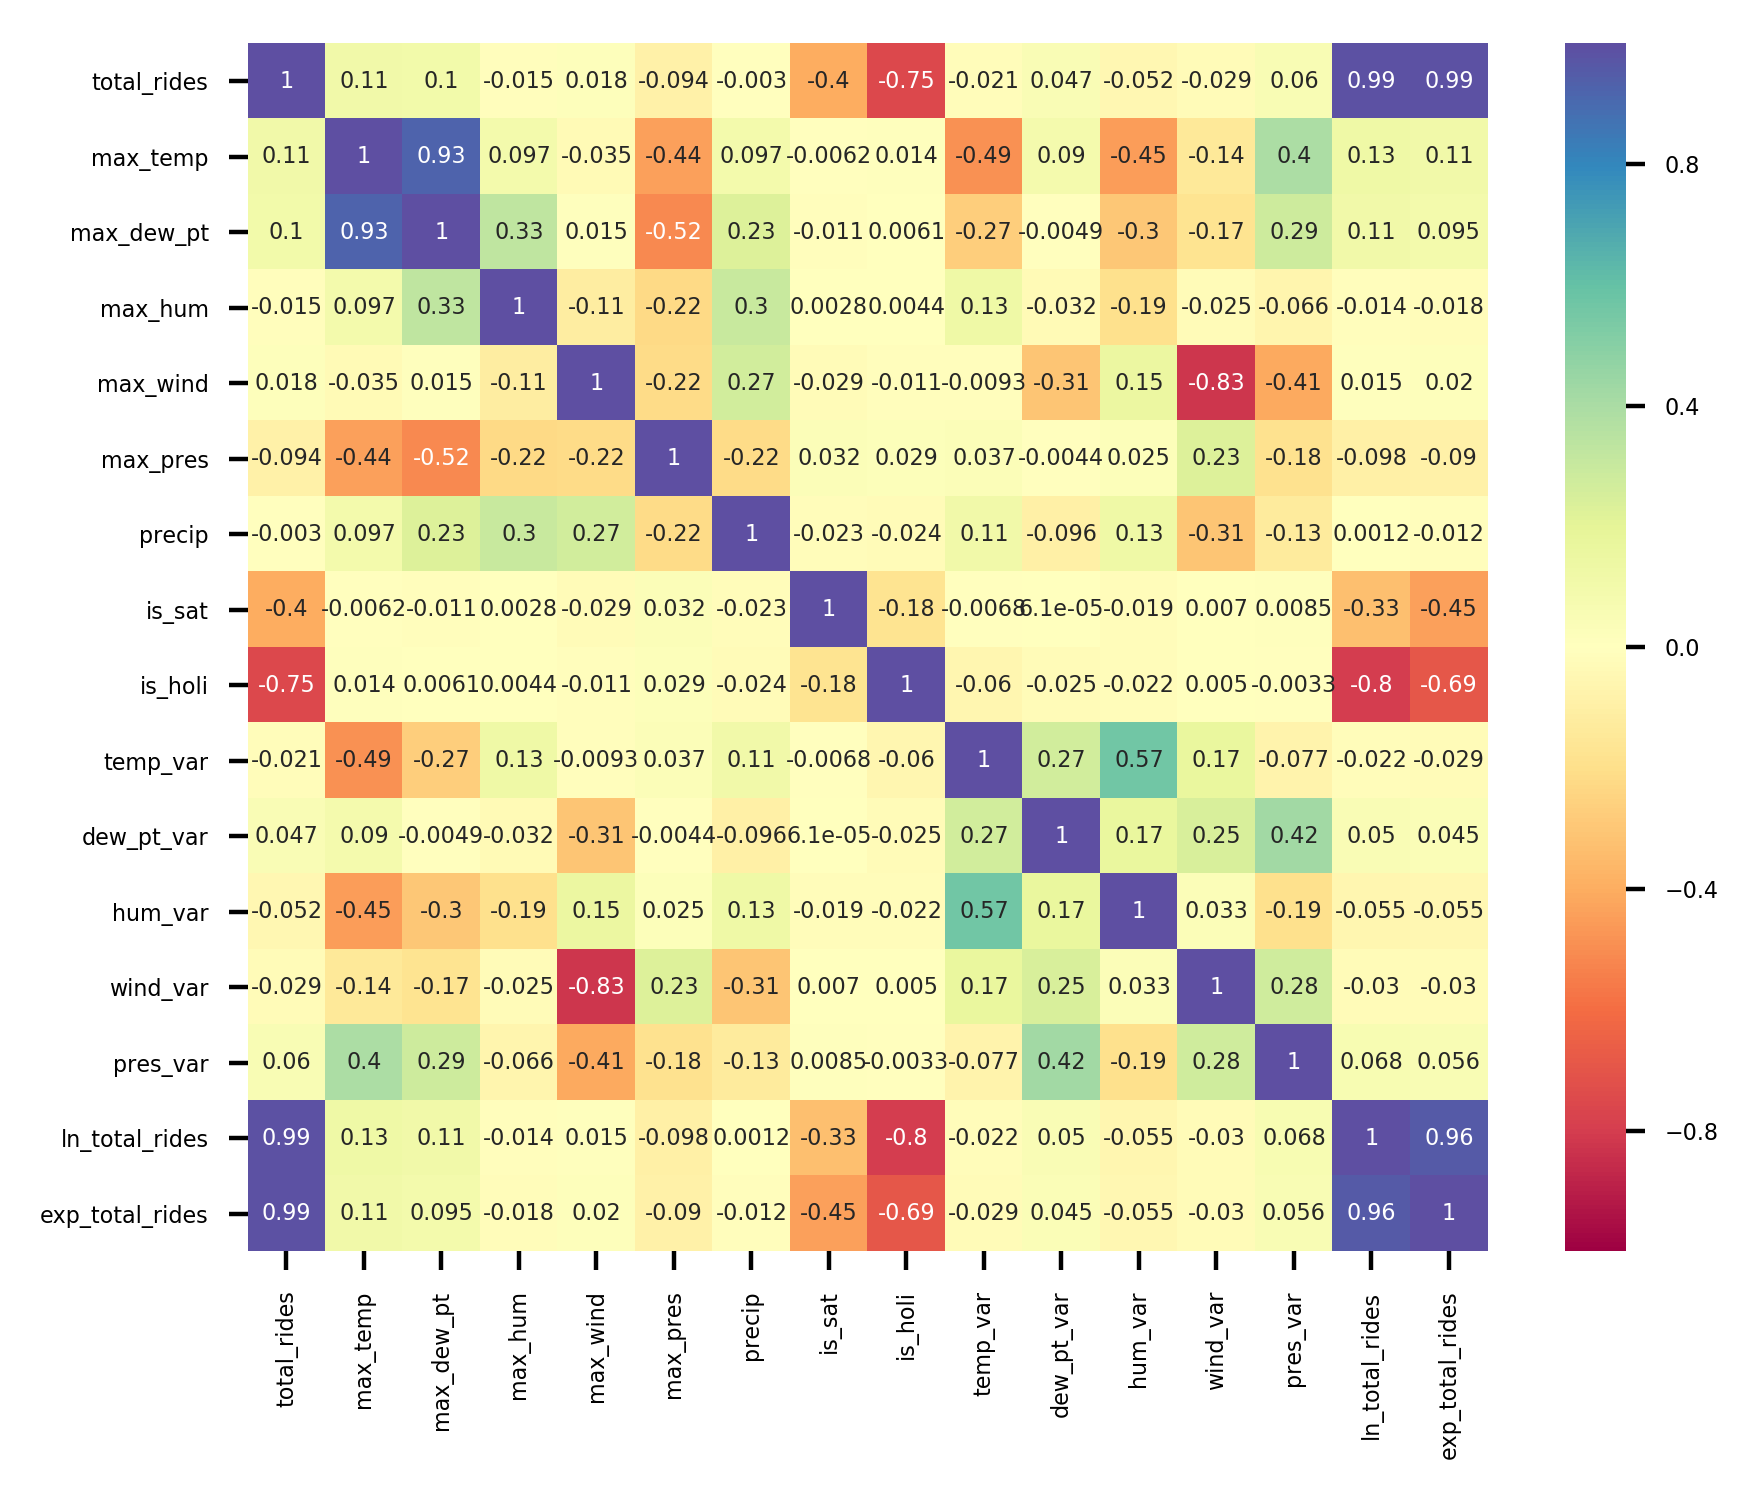

In [33]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (5, 4)
rcParams['figure.dpi'] = 400
rcParams['font.size'] = 4
sns.heatmap(chi_data.corr(), cmap="Spectral", annot=True, vmin=-1, vmax=1);

In [34]:
patsy_func = 'exp_total_rides ~ '+(' + '.join(chi_data.columns[2:-2]))

In [35]:
patsy_func

'exp_total_rides ~ max_temp + max_dew_pt + max_hum + max_wind + max_pres + precip + is_sat + is_holi + temp_var + dew_pt_var + hum_var + wind_var + pres_var'

In [36]:
# Create the feature matrix (X) and target vector (y)
y, X = patsy.dmatrices(patsy_func, data=chi_data, return_type="dataframe")

# Create the model
model = sm.OLS(y, X)

# Fit the model to the training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        exp_total_rides   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     2006.
Date:                Fri, 12 Oct 2018   Prob (F-statistic):               0.00
Time:                        11:47:07   Log-Likelihood:                -4607.1
No. Observations:                5369   AIC:                             9242.
Df Residuals:                    5355   BIC:                             9335.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.0057      1.534      5.869      0.000       5.997      12.014
max_temp      -0.0066      0.004     -1.728      0.084      -0.014       0.001
max_dew_pt     0.0131      0.004      3.238      0.001       0.005       0.021
max_hum       -0.0075      0.002     -4.006      0.000      -0.011      -0.004
max_wind      -0.0009      0.003     -0.316      0.752      -0.006       0.005
max_pres      -0.1278      0.049     -2.591      0.010      -0.225      -0.031
precip        -0.2600      0.034     -7.594      0.000      -0.327      -0.193
is_sat        -2.3274      0.023   -102.179      0.000      -2.372      -2.283
is_holi       -3.0136      0.022   -138.746      0.000      -3.056      -2.971
temp_var      -0.0084      0.003     -3.322      0.001      -0.013      -0.003
dew_pt_var     0.0123      0.003      4.917      0.000       0.007       0.017
hum_var       -0.0068      0.001     -5.612      0.000      -0.009      -0.004
wind_var      -0.0069      0.003     -2.394      0.017      -0.013      -0.001
pres_var       0.0176      0.078      0.226      0.822      -0.135       0.171
==============================================================================
Omnibus:                      715.147   Durbin-Watson:                   0.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1936.187
Skew:                          -0.731   Prob(JB):                         0.00
Kurtosis:                       5.552   Cond. No.                     2.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

0      -0.024608
1      -0.217131
2       1.107064
3      -0.131046
4      -0.569614
5      -0.214483
6      -0.189338
7      -0.202784
8      -0.653597
9      -0.592146
10     -0.349071
11     -0.324834
12     -0.236450
13     -0.302069
14     -0.298864
15     -0.780073
16     -0.344003
17     -0.471582
18     -0.433578
19     -0.610936
20     -0.528010
21     -0.363074
22     -1.079558
23     -0.489337
24     -0.410067
25     -0.202603
26     -0.333237
27     -0.086485
28     -0.368378
29     -0.541662
          ...   
6239   -0.408360
6240   -0.495855
6241   -0.058934
6242   -0.082796
6243   -0.209644
6244   -0.554732
6245   -0.123986
6246   -0.189528
6247   -0.117565
6248   -0.329894
6249    0.073442
6250    0.276244
6251   -0.474635
6252   -0.377782
6253   -0.553244
6254   -0.479049
6255   -0.665345
6256   -0.398496
6257   -0.322636
6258   -0.991414
6259   -0.453147
6260   -0.627773
6261   -0.956956
6262   -0.800358
6263   -0.359442
6264    0.295792
6265   -0.942612
6266   -0.7640

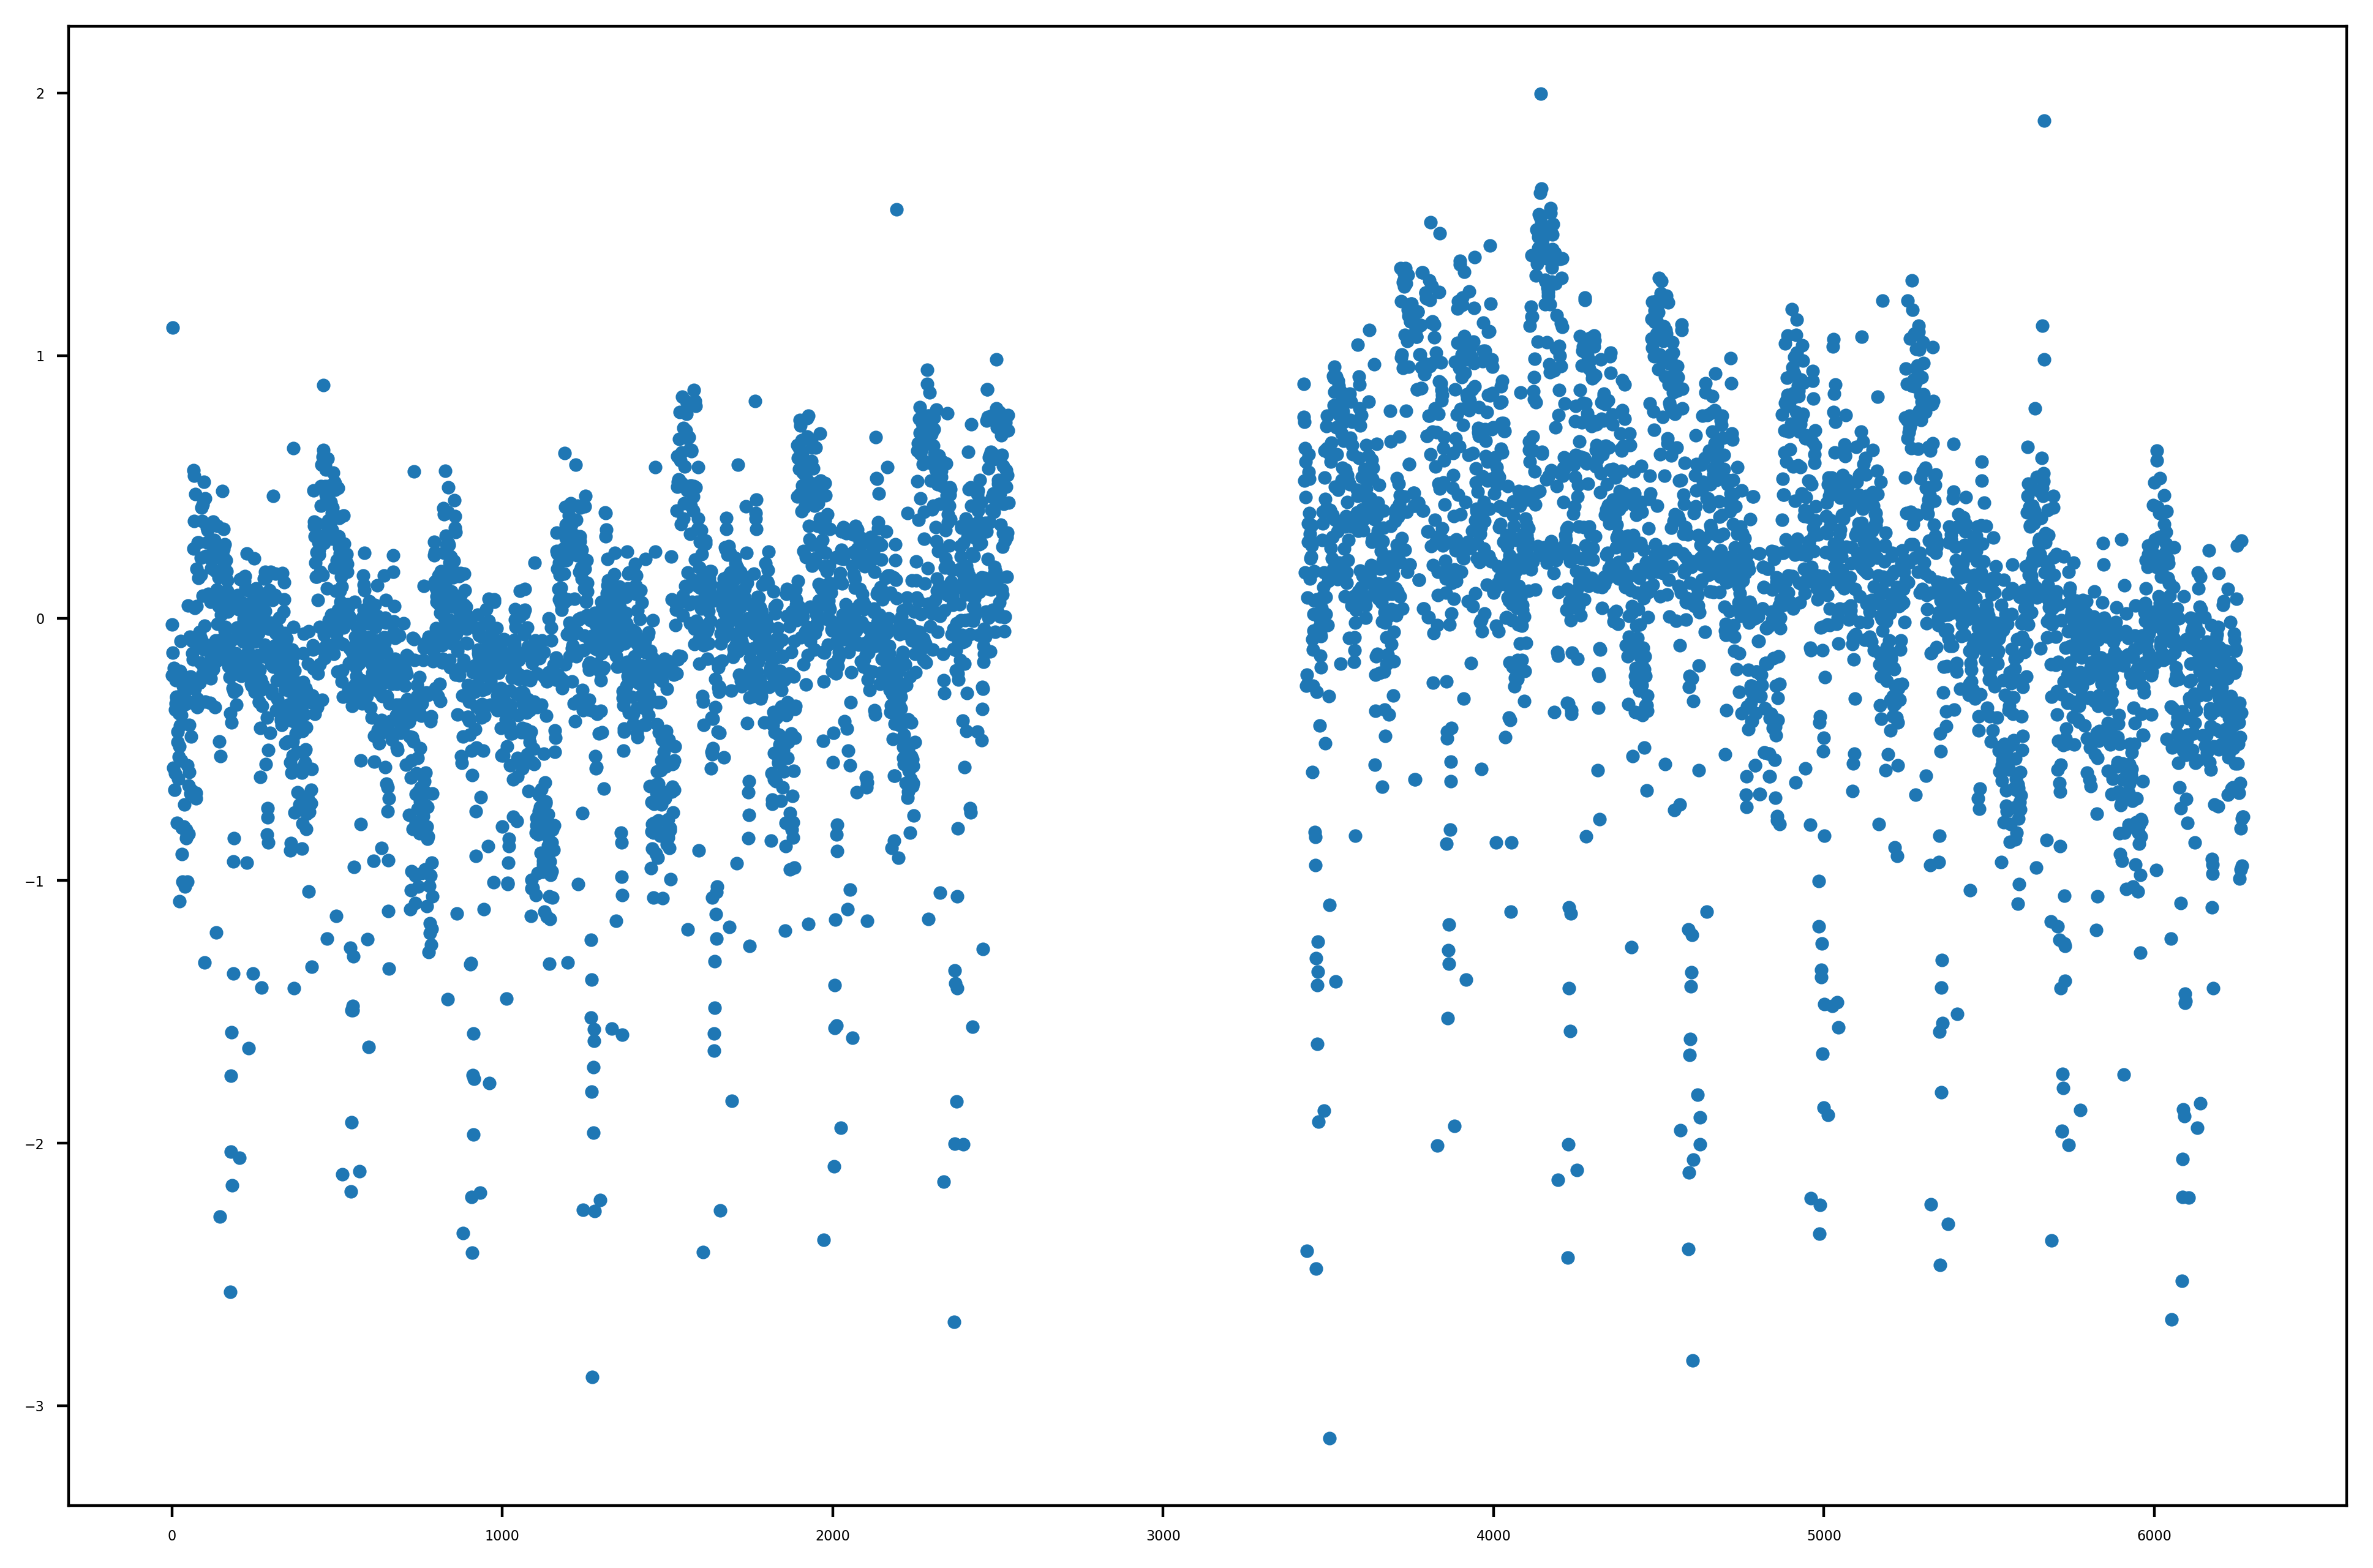

In [37]:
fit.resid.plot(style='.', figsize=(12,8));

fit.resid

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


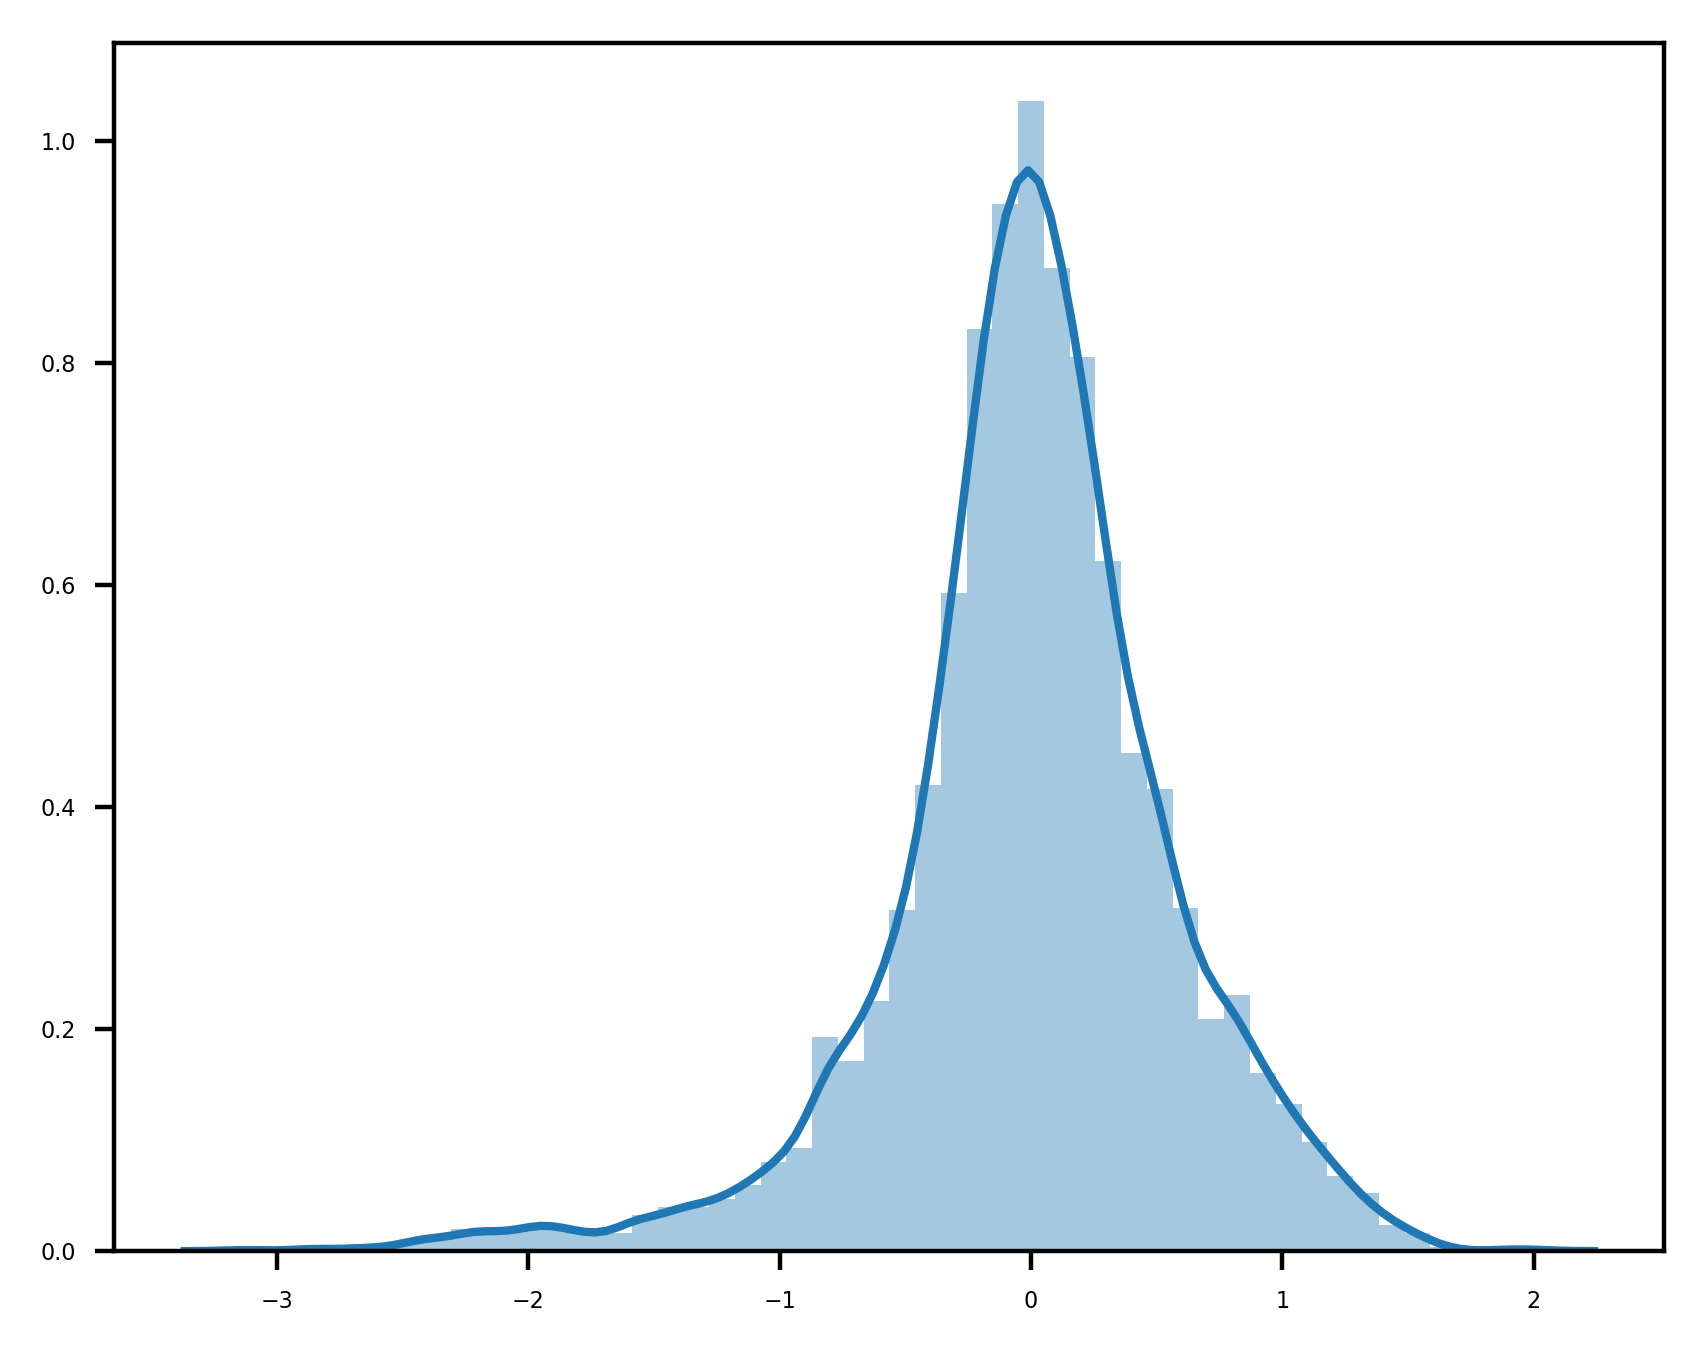

In [38]:
sns.distplot(fit.resid);

In [39]:
# Create an empty model
lr = LinearRegression()

# Choose the predictor variables, here all but the first which is the response variable
# This model is analogous to the Y ~ X1 + X2 + X3 + X4 + X5 + X6 model
X = chi_data.iloc[:, 2:-2]

# Choose the response variable(s)
y = chi_data.iloc[:, chi_data.columns.get_loc('exp_total_rides')]

# Fit the model to the full dataset
lr.fit(X, y)

# Print out the R^2 for the model against the full dataset
lr.score(X,y)

0.8296350938305377

### Coefficients for linear degree 1 model

In [40]:
# print out intercept
print(lr.intercept_)

# print out other coefficients
lr.coef_

9.005720710232655


array([-6.60121604e-03,  1.30572886e-02, -7.52610372e-03, -8.80002447e-04,
       -1.27824227e-01, -2.60043379e-01, -2.32736644e+00, -3.01363099e+00,
       -8.38560547e-03,  1.23424412e-02, -6.80034398e-03, -6.91135459e-03,
        1.76133951e-02])

In [42]:
chi_data.columns

Index(['Unnamed: 0', 'total_rides', 'max_temp', 'max_dew_pt', 'max_hum',
       'max_wind', 'max_pres', 'precip', 'is_sat', 'is_holi', 'temp_var',
       'dew_pt_var', 'hum_var', 'wind_var', 'pres_var', 'ln_total_rides',
       'exp_total_rides'],
      dtype='object')

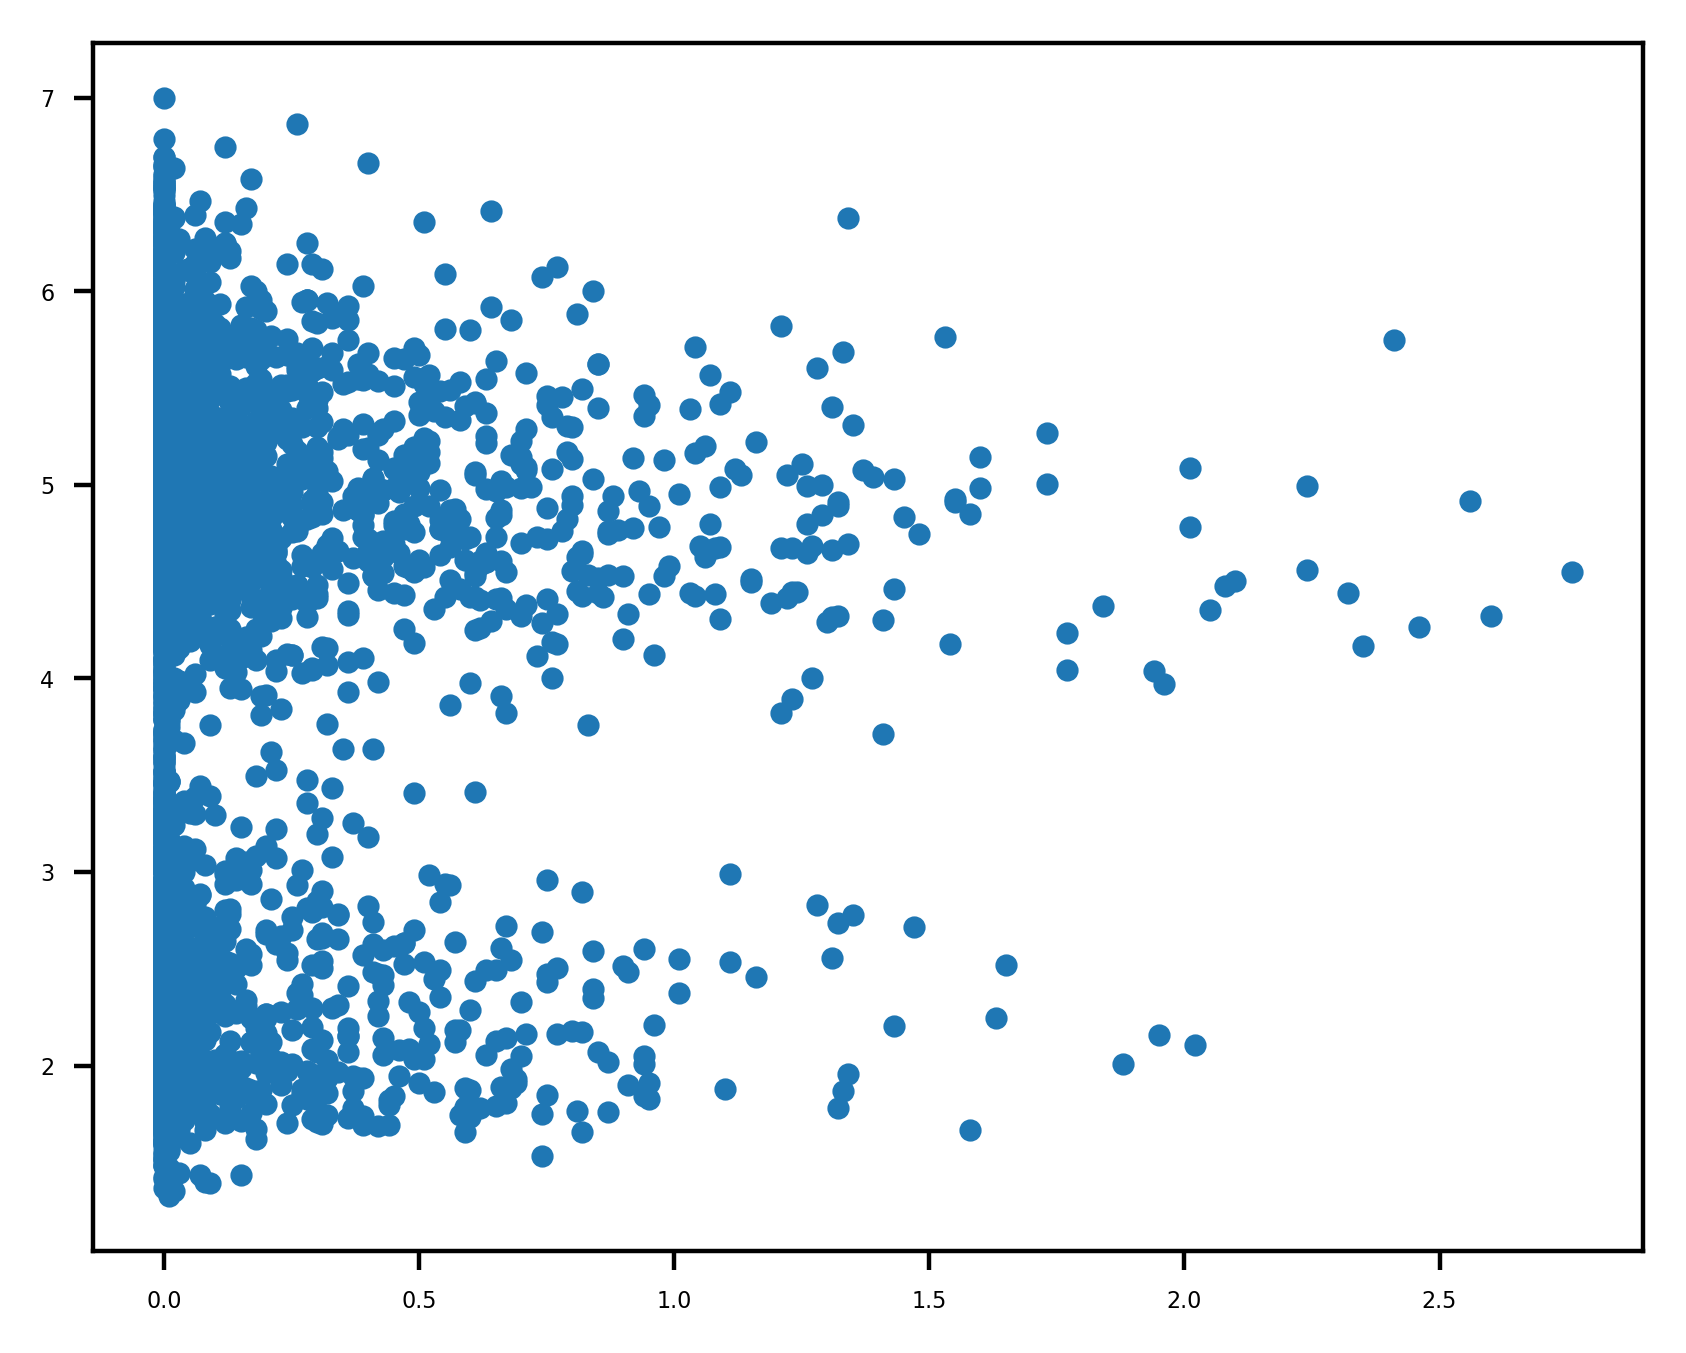

In [59]:
plt.scatter(y=chi_data['exp_total_rides'], x=chi_data['precip'], marker='.', )

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


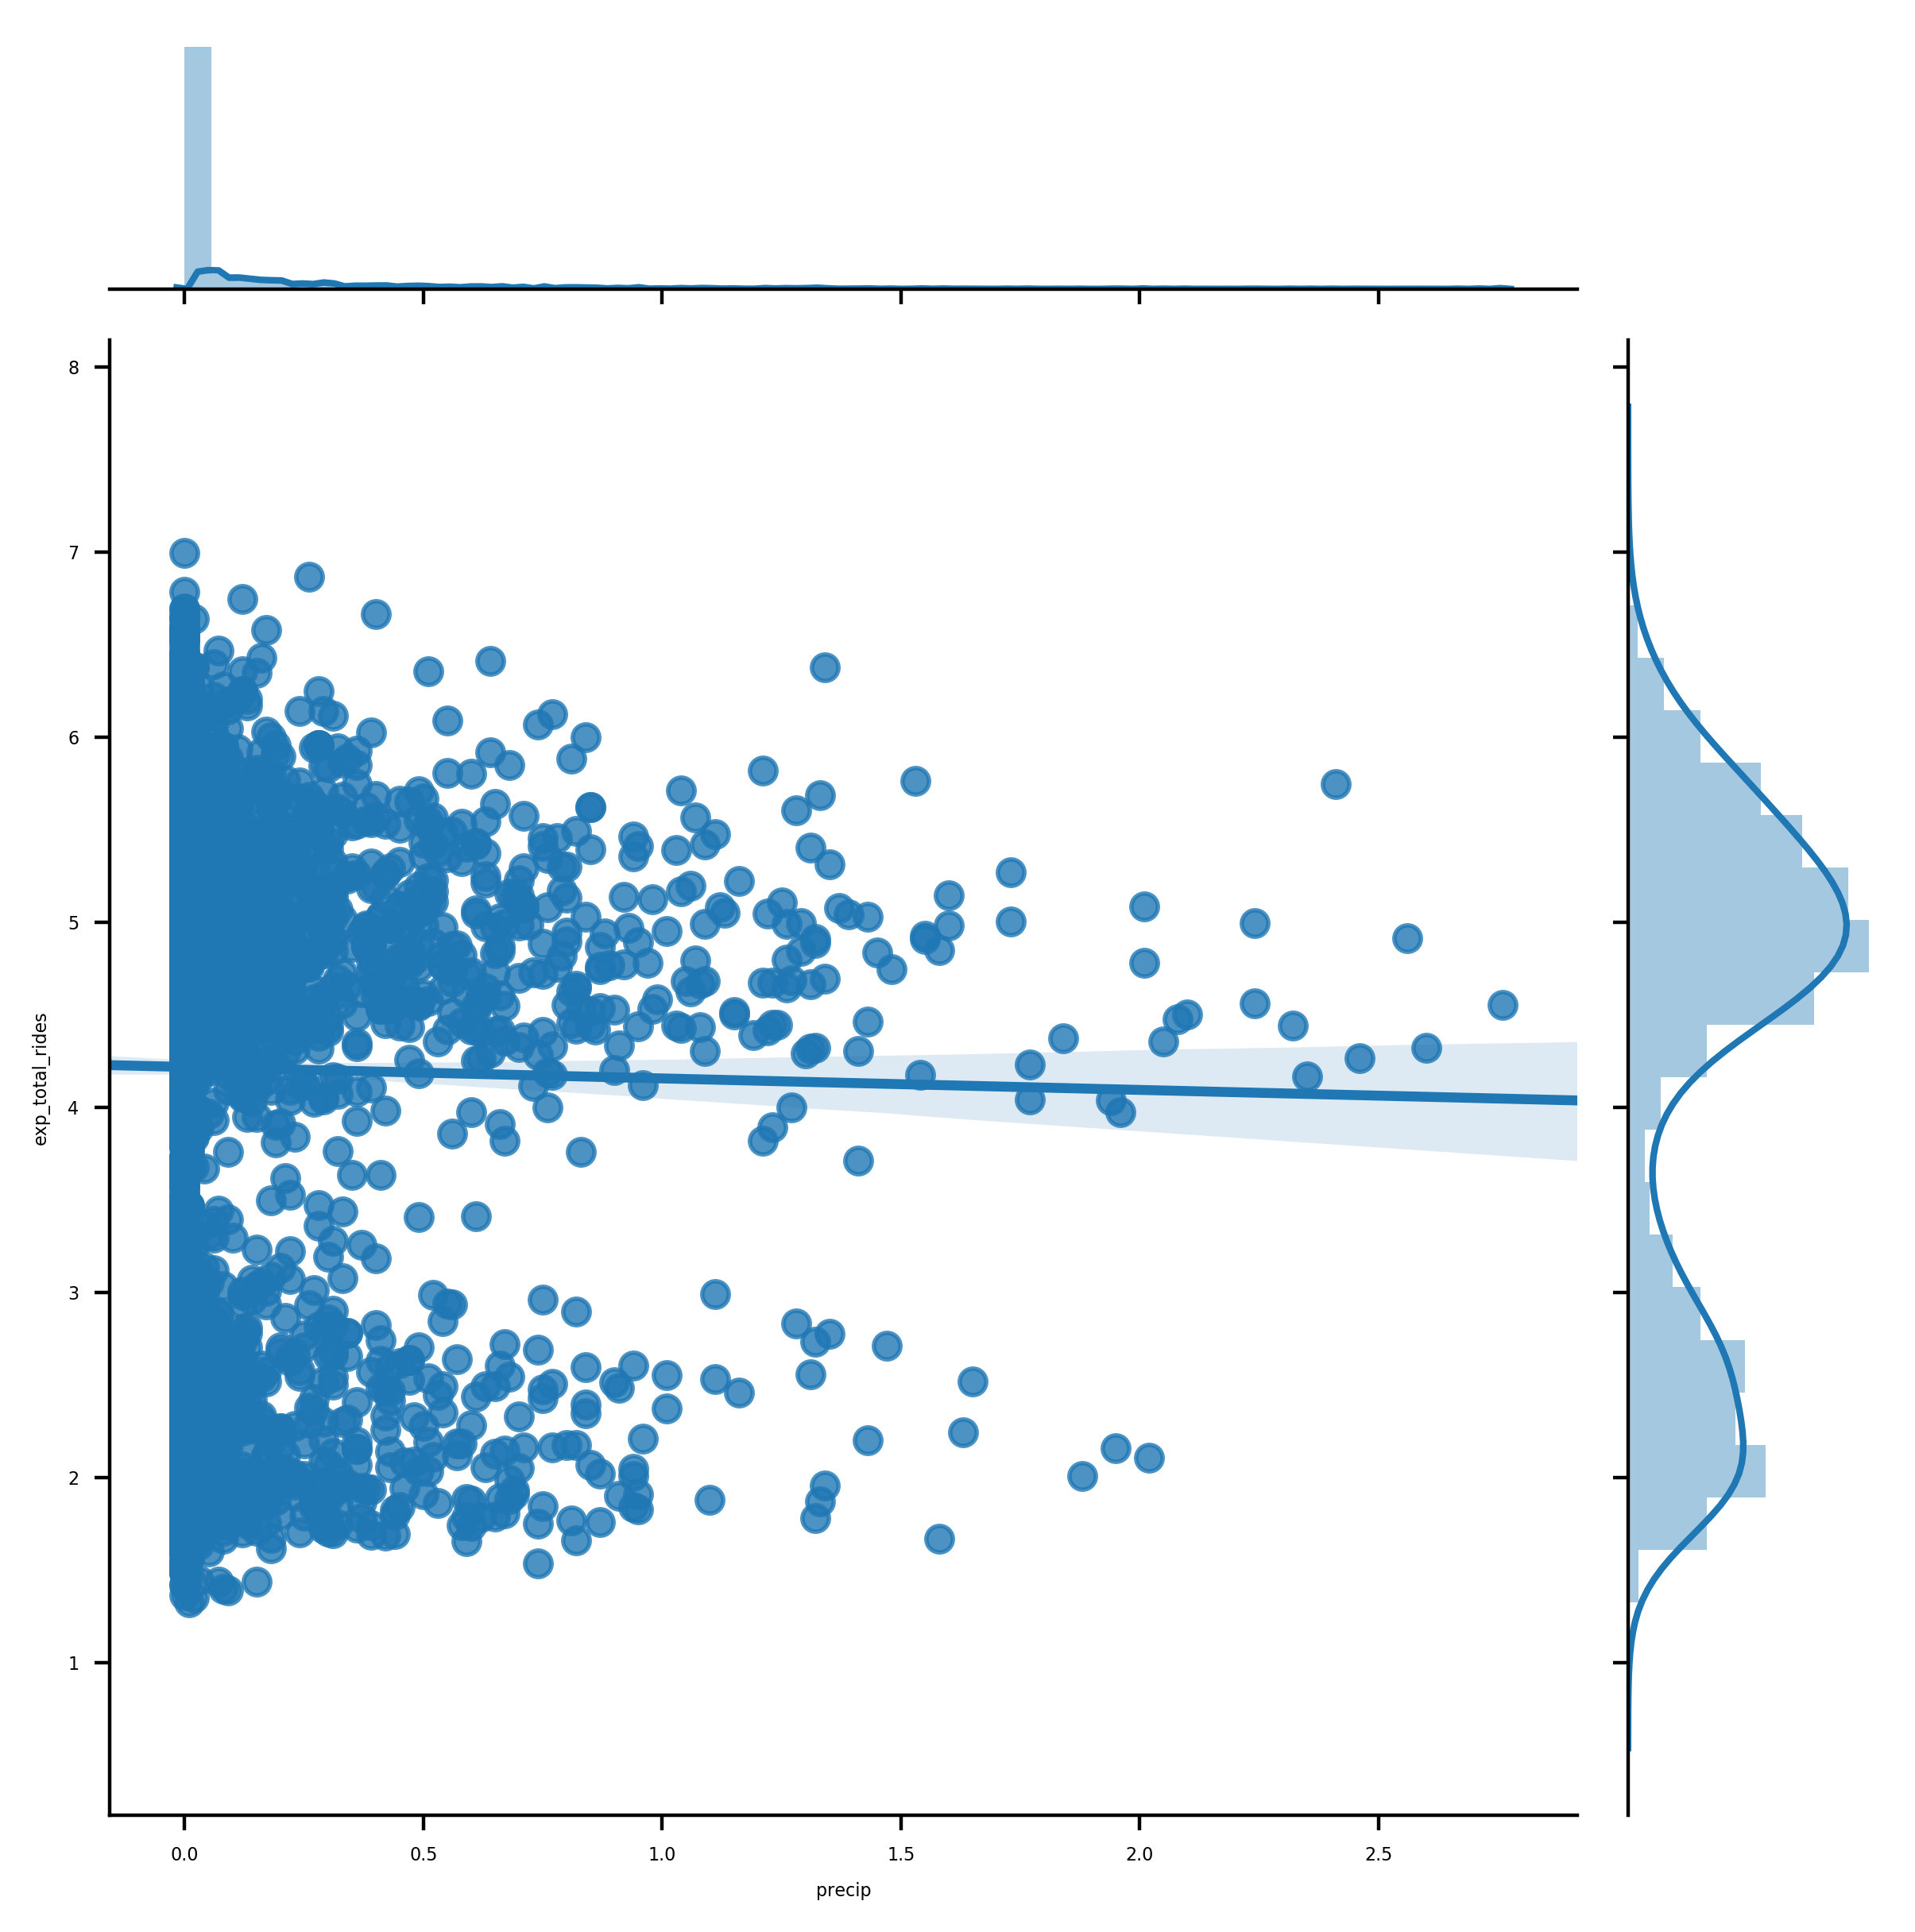

In [60]:
g = sns.jointplot(x='precip', y='exp_total_rides', data=chi_data, kind="reg");
#g.ax_marg_x.set_axis_off()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


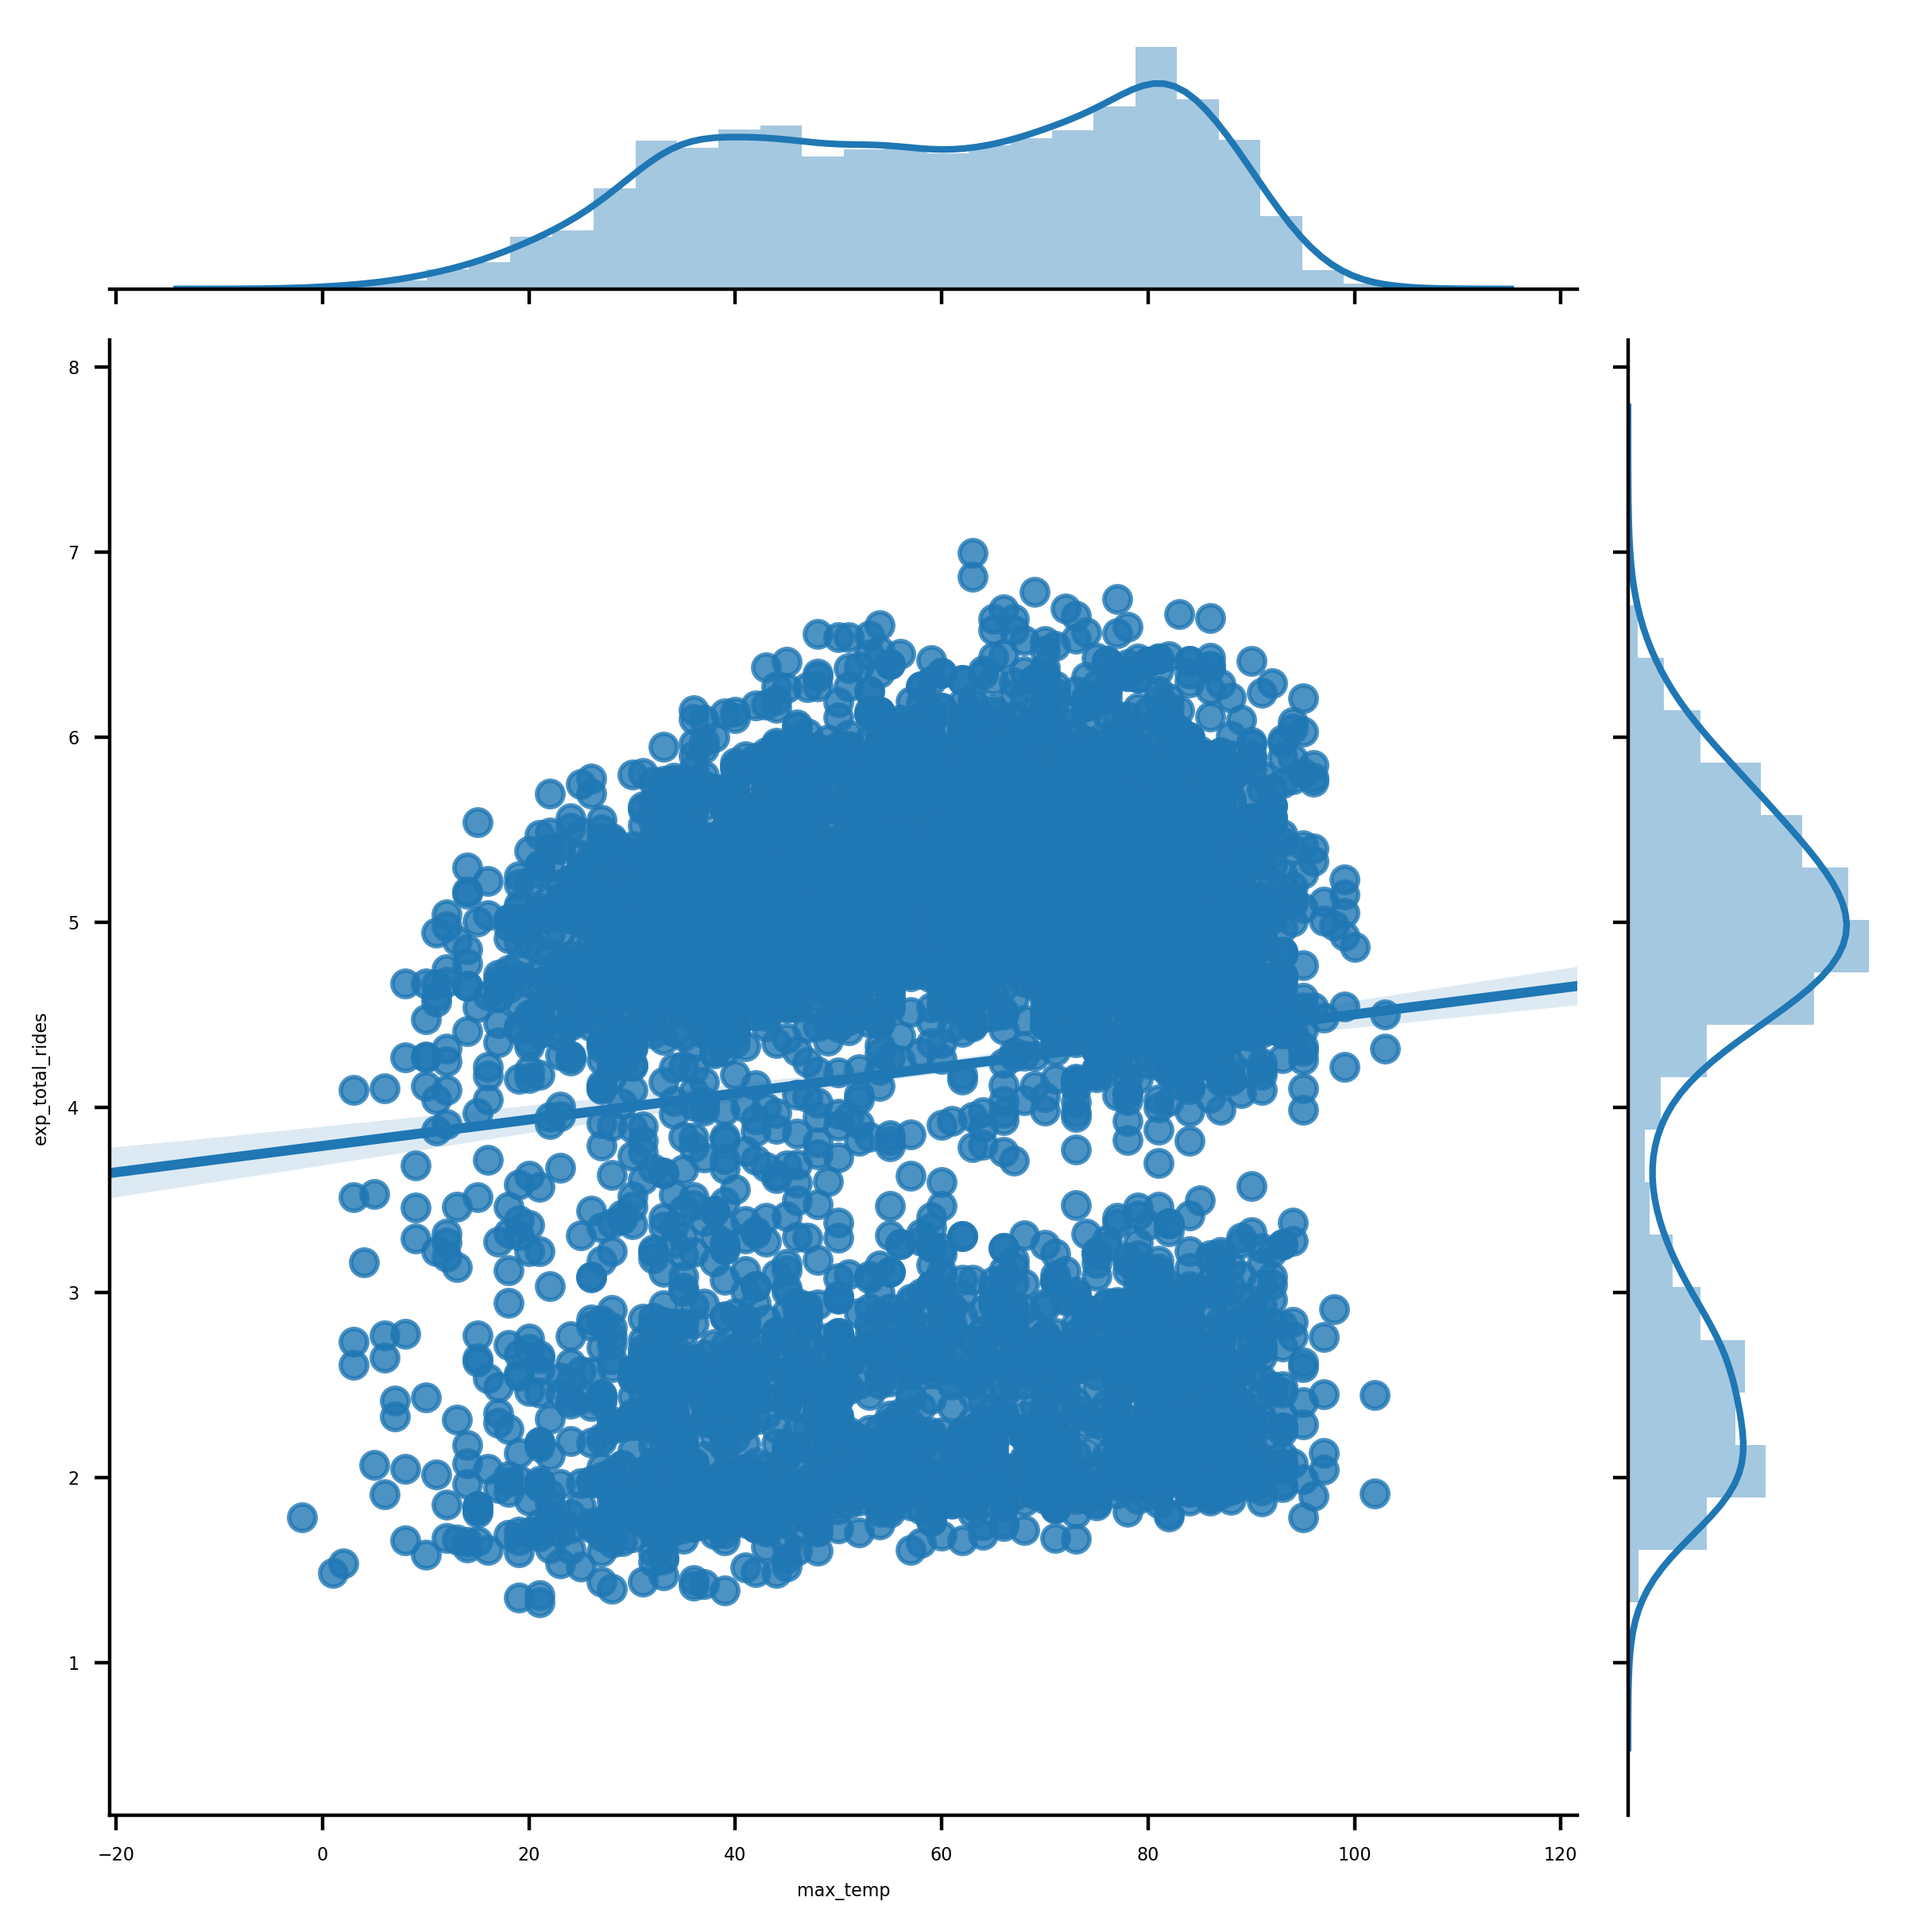

In [61]:
g = sns.jointplot(x='max_temp', y='exp_total_rides', data=chi_data, kind="reg");

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


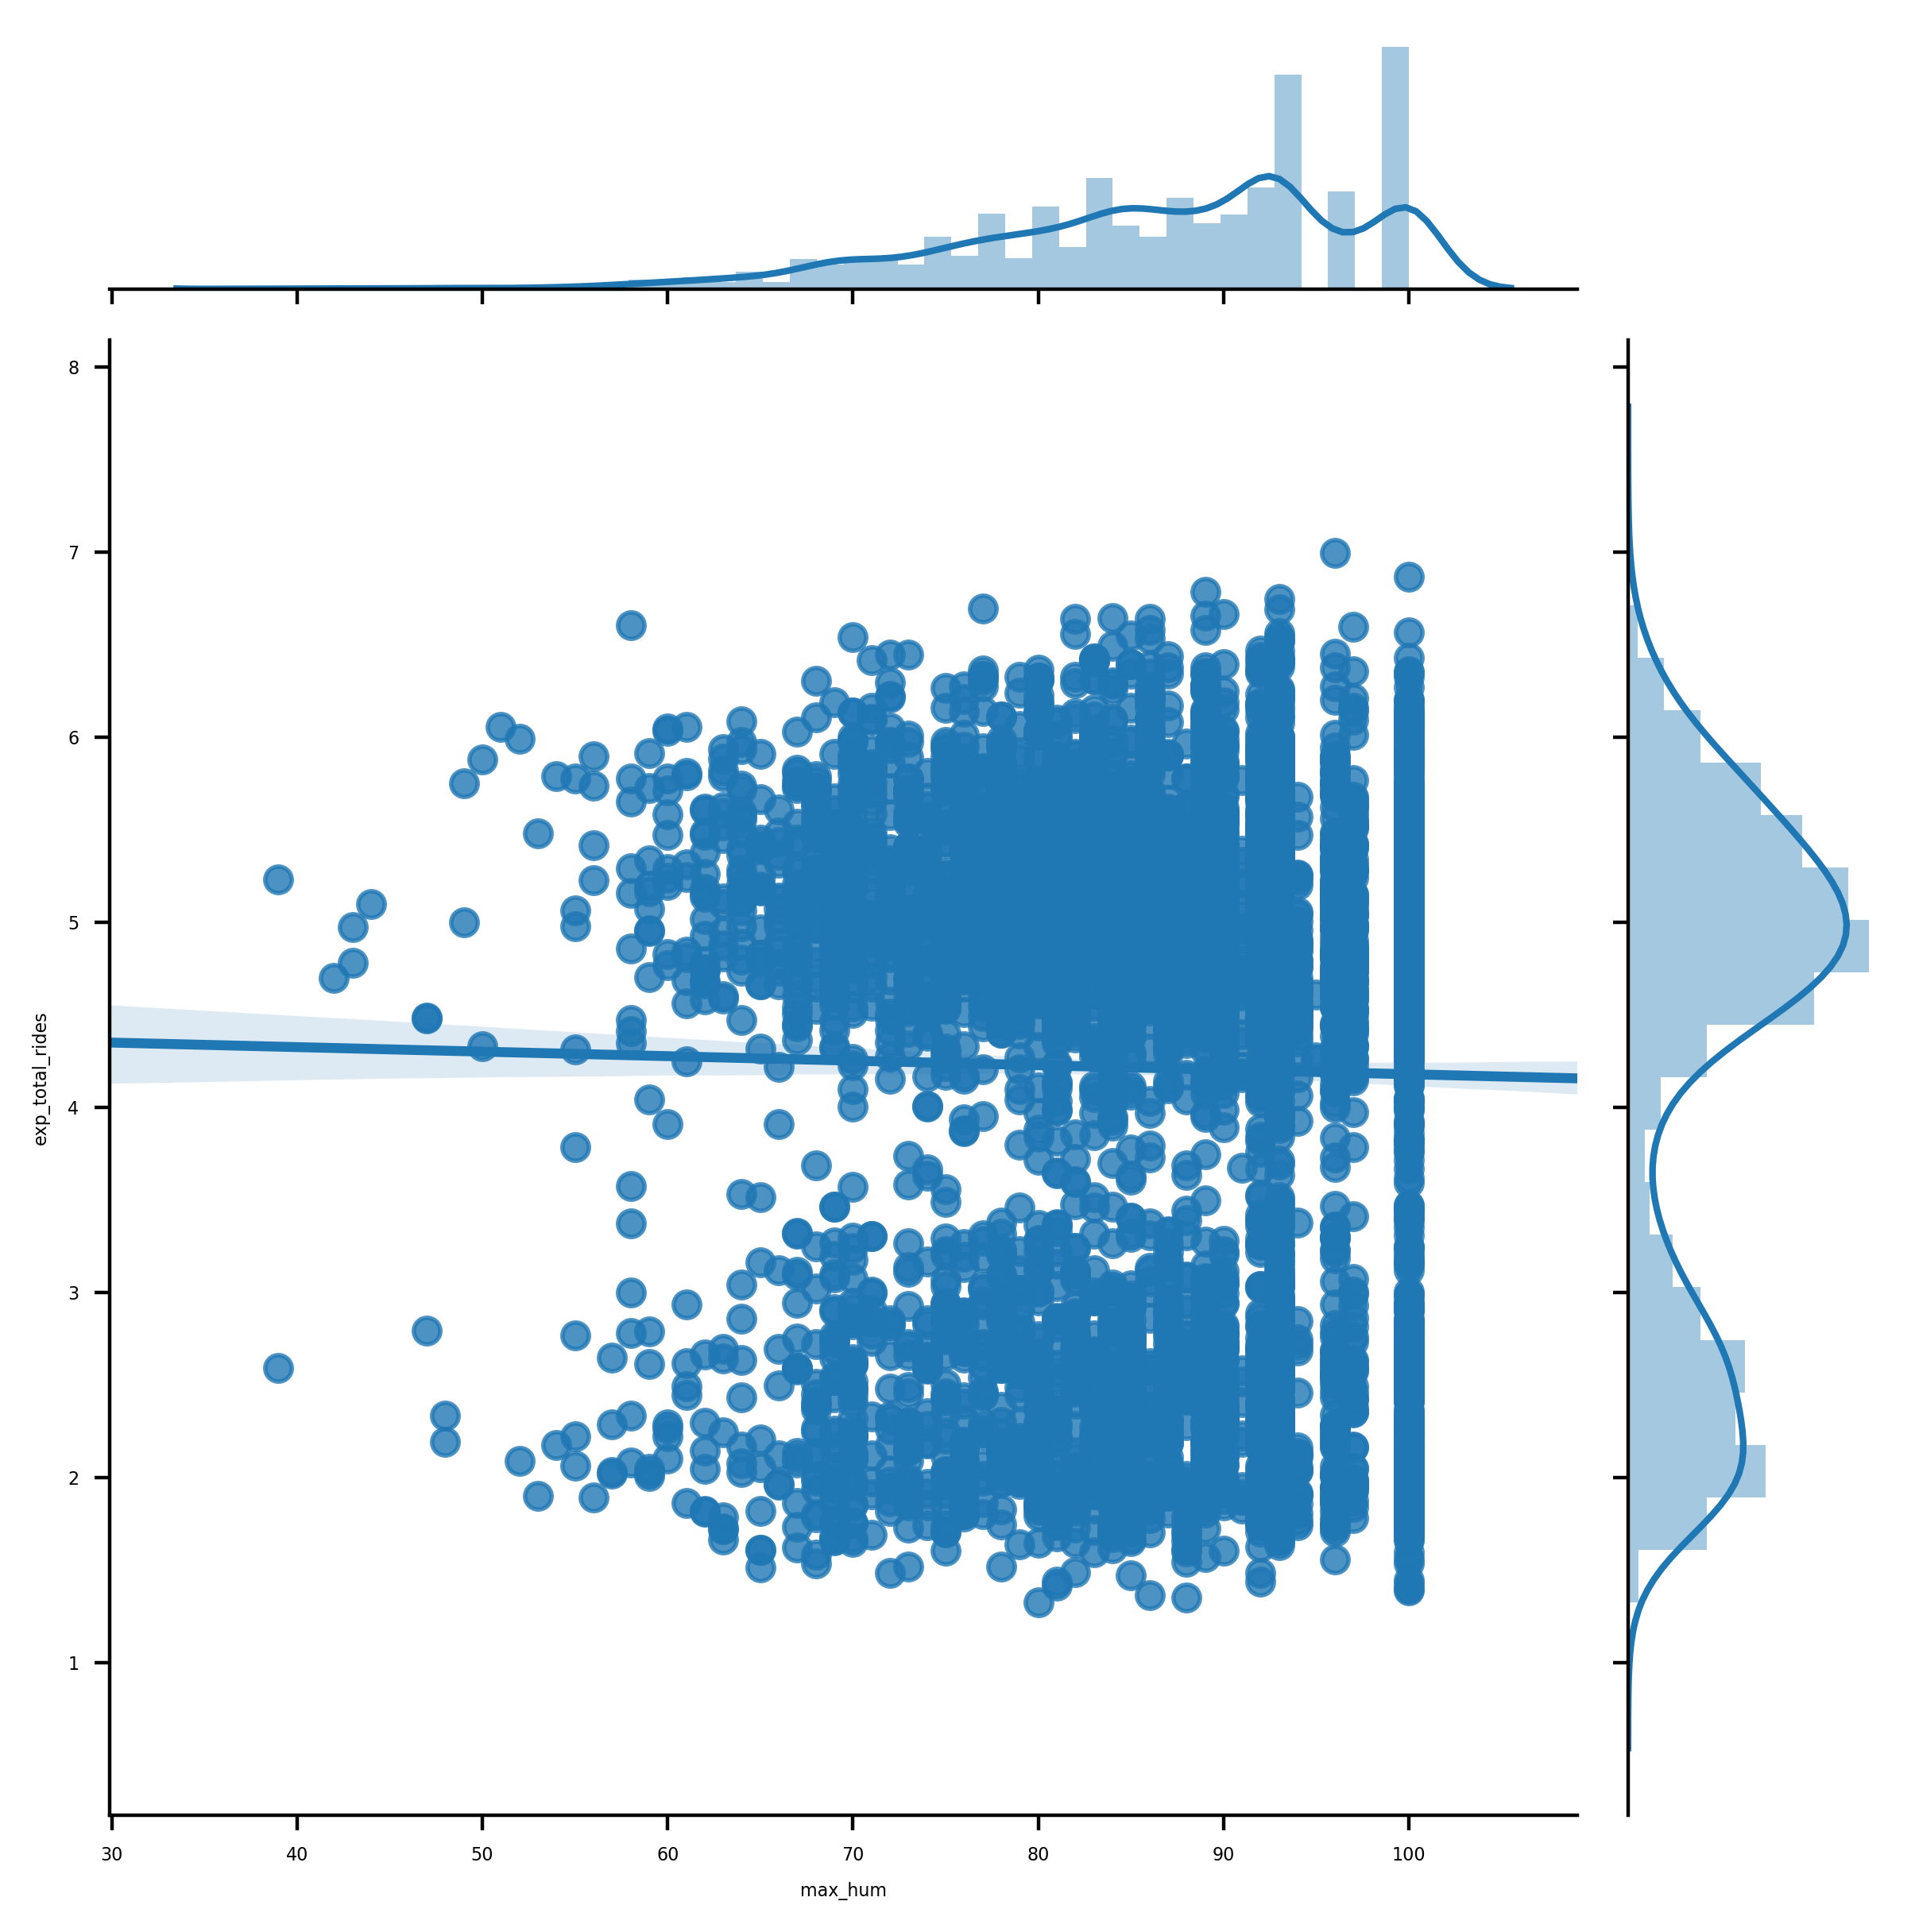

In [64]:
g = sns.jointplot(x='max_hum', y='exp_total_rides', data=chi_data, kind="reg");

In [14]:

import numpy as np
import pandas as pd

df = pd.DataFrame(data=np.random.random((100, 2)), columns=['A', 'B'])
df.A.scatter(use_index = False)
df.B.scatter(ax=list(df.A), logx = True)

AttributeError: 'Series' object has no attribute 'scatter'

In [6]:
list(df.A)

[0.791377692240169,
 0.1614737484533173,
 0.7783891102487663,
 0.08698938002176959,
 0.21087397848057132,
 0.6188207677301177,
 0.7015531846999389,
 0.40399194348931844,
 0.6535620323690347,
 0.5106504475051604,
 0.9355804570380897,
 0.024560383312015377,
 0.3228738145166784,
 0.6420494966648513,
 0.032337228364788584,
 0.44676009253143667,
 0.6030577102492647,
 0.642829080592917,
 0.15679185586934785,
 0.43981246342680214,
 0.792481514664804,
 0.1951667417657924,
 0.6142208469414551,
 0.9013434208751893,
 0.8882536533094081,
 0.7823327381103726,
 0.7405765559513712,
 0.7466247694015722,
 0.42188068028675574,
 0.6243054649703178,
 0.9890111398818311,
 0.6300658225898449,
 0.9822960066685771,
 0.30959172995225004,
 0.14268742159705128,
 0.9664708909059136,
 0.409496187937316,
 0.3798357165267602,
 0.13162371588699773,
 0.5407620869305478,
 0.9964631800629588,
 0.23999823345341598,
 0.29524383667766696,
 0.7409469238643958,
 0.9140373685093284,
 0.7689872967860045,
 0.2300192357559675,
 

In [174]:
len(chi_data)

5369

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Set the degree of our polynomial
degree = 3

# Generate the model type with make_pipeline
# This tells it the first step is to generate 3rd degree polynomial features in the input features and then run
# a linear regression on the resulting features
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit our model to the training data
est.fit(X, y)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [43]:
# Print out the R^2 for the model against the full dataset
est.score(X,y)



0.9062175597964365

In [67]:
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
% matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [101]:
lr = LinearRegression()
# INSTRUCTOR NOTE: Run this multiple times to show the variation
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Fit the model against the training data
lr.fit(X_train, y_train)
# Evaluate the model against the testing data
lr.score(X_test, y_test)

0.8239665043617954

In [102]:
lr.score(X_train, y_train)

0.8319802324705475

In [90]:
fit.pvalues

Intercept     4.652060e-09
max_temp      8.409744e-02
max_dew_pt    1.212848e-03
max_hum       6.251852e-05
max_wind      7.517200e-01
max_pres      9.593690e-03
precip        3.640496e-14
is_sat        0.000000e+00
is_holi       0.000000e+00
temp_var      8.983516e-04
dew_pt_var    9.048597e-07
hum_var       2.096646e-08
wind_var      1.670848e-02
pres_var      8.215267e-01
dtype: float64

In [103]:
len(chi_data)

5369

In [70]:
lr1 = LinearRegression()
lr1.fit(X, y)
lr1.score(X, y)

0.8296350938305377

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
# 10-fold cross-validation with our fake data
reg = LinearRegression()
scores = cross_val_score(reg, X, y, cv=10, scoring='neg_mean_squared_error')

# scores output is negative, a sklearn quirk bc mse is used to min. optimization func.
print(-scores)

[1.47073499e+10 1.92872432e+10 1.84941981e+10 1.22566344e+10
 2.02351442e+10 2.33604979e+10 3.20106091e+10 1.63619290e+10
 1.67815973e+10 1.77048385e+10]


In [ ]:
##############new day#############

In [49]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=8)


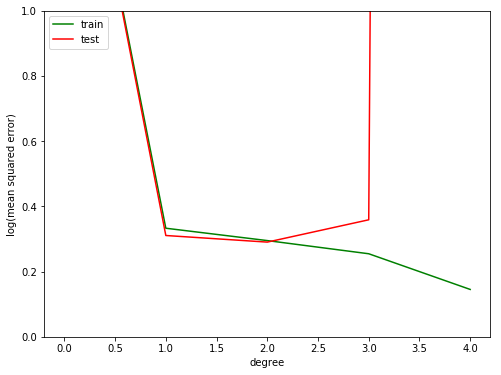

In [76]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error

# Step through degrees from 0 to 4 and store the training and test (generalization) error.
# create array of zeros,
train_error = np.empty(5)
test_error = np.empty(5)
for degree in range(5):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    train_error[degree] = mean_squared_error(y_train, est.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, est.predict(X_test))

# Plot the training and test errors against degree
plt.figure(figsize=(8,6))
plt.plot(np.arange(5), train_error, color='green', label='train')
plt.plot(np.arange(5), test_error, color='red', label='test')
plt.ylim((0.0, 1))
plt.ylabel('log(mean squared error)')
plt.xlabel('degree')
plt.legend(loc='upper left')

In [110]:
est

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [111]:
linear_model.Lasso(alpha=alpha)

Lasso(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [178]:
from sklearn.linear_model import Ridge, Lasso
plots = 10
# Set up a figure and axes for 8 plots, 2 per row for 4 rows
fig, ax_rows = plt.subplots(plots, 2, figsize=(15, 30))

# A helper function to plot the absolute value of the coefficients on the right-hand column plot
def plot_coefficients(est, ax, label=None, yscale='log'):
    coef = est.steps[-1][1].coef_.ravel()
    if yscale == 'log':
        ax.semilogy(np.abs(coef), marker='o', label=label)
        ax.set_ylim((1e-1, 1e8))
    else:
        ax.plot(np.abs(coef), marker='o', label=label)
    ax.set_ylabel('abs(coefficient)')
    ax.set_xlabel('coefficients')
    ax.set_xlim((0, len(coef)))
    ax.set_ylim(1,1e12)

degree = 2
alphas = np.logspace(1e-9, 1, num=plots)
for alpha, ax_row in zip(alphas, ax_rows):
    ax_left, ax_right = ax_row
    est = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha))
    est.fit(X_train, y_train)
    plot_coefficients(est, ax_left, label='Ridge(alpha=%r) coefficients' % alpha)
    est = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
    est.fit(X_train, y_train)
    plot_coefficients(est, ax_right, label='Ridge(alpha=%r) coefficients' % alpha)

plt.tight_layout()

In [62]:
from sklearn import linear_model
from sklearn.model_selection import KFold
import pandas as pd


# In[2]:


df = chi_data
df.head(10)


# In[3]:


y = df.pop('total_rides')

In [65]:
y

0        706369
1       1586646
2       1817879
3        767555
4       1525074
5       1601976
6        946546
7        695721
8       1533175
9       1547135
10      1575069
11      1585787
12      1598341
13       963025
14       661964
15      1503906
16      1546190
17      1548192
18      1568142
19      1548559
20       899002
21       580239
22      1429003
23      1569886
24      1487323
25      1591522
26      1568109
27       965043
28       668950
29      1494448
         ...   
6239    1510234
6240    1573050
6241    1624869
6242     933303
6243     726096
6244    1547222
6245    1604831
6246    1598684
6247    1620210
6248    1545893
6249     939454
6250     671429
6251    1505812
6252    1557538
6253    1543786
6254    1550425
6255    1510839
6256     914206
6257     676689
6258    1465430
6259    1547623
6260    1504766
6261    1312162
6262    1358787
6263     940004
6264     897821
6265    1440782
6266    1432557
6267    1478347
6268    1510286
Name: total_rides, Lengt

In [73]:
df.drop(columns='Unnamed: 0')

max_temp  max_dew_pt  max_hum  max_wind  max_pres  precip  is_sat  \
0         78.0        68.0     84.0      21.0     30.27    0.00       0   
1         78.0        49.0     77.0      12.0     30.31    0.00       0   
2         79.0        68.0     97.0      17.0     30.09    0.07       0   
3         88.0        68.0     93.0      21.0     29.97    0.00       0   
4         73.0        53.0     80.0      17.0     30.11    0.00       0   
5         81.0        67.0     83.0      12.0     30.15    0.00       0   
6         86.0        79.0     97.0      16.0     29.96    0.17       1   
7         89.0        75.0    100.0       9.0     29.93    0.00       0   
8         91.0        74.0    100.0      12.0     29.90    0.00       0   
9         93.0        69.0     87.0      18.0     29.92    0.00       0   
10        78.0        54.0     72.0      14.0     30.04    0.00       0   
11        80.0        56.0     83.0      14.0     30.09    0.00       0   
12        79.0        57.0     83.0      14.0     30.17    0.00       0   
13        87.0        54.0     61.0      14.0     30.08    0.00       1   
14        88.0        61.0     81.0       9.0     30.05    0.00       0   
15        86.0        64.0     90.0      13.0     30.04    0.00       0   
16        86.0        75.0    100.0      15.0     30.01    0.45       0   
17        84.0        75.0    100.0      14.0     29.99    0.04       0   
18        88.0        74.0    100.0      15.0     30.05    0.00       0   
19        93.0        76.0    100.0      13.0     30.03    0.00       0   
20        93.0        76.0     94.0      14.0     29.93    0.00       1   
21        95.0        78.0    100.0      14.0     29.95    0.59       0   
22        91.0        79.0     97.0      22.0     29.87    0.09       0   
23        90.0        75.0    100.0      12.0     29.92    0.01       0   
24        75.0        72.0    100.0      15.0     30.03    0.82       0   
25        78.0        68.0     94.0      18.0     30.20    0.00       0   
26        78.0        64.0     84.0      15.0     30.26    0.00       0   
27        78.0        72.0    100.0       9.0     30.12    0.00       1   
28        90.0        74.0    100.0      10.0     29.98    0.00       0   
29        90.0        73.0    100.0      12.0     30.05    0.00       0   
...        ...         ...      ...       ...       ...     ...     ...   
6239      86.0        70.0     93.0      21.0     29.78    0.90       0   
6240      89.0        68.0     90.0      18.0     29.75    0.00       0   
6241      76.0        65.0     84.0      24.0     29.99    0.00       0   
6242      70.0        59.0     84.0      15.0     30.01    0.31       1   
6243      78.0        58.0     90.0      26.0     29.96    0.00       0   
6244      80.0        50.0     77.0      21.0     30.04    0.00       0   
6245      72.0        53.0     64.0      23.0     29.94    0.01       0   
6246      79.0        58.0     80.0      16.0     30.00    0.10       0   
6247      81.0        58.0     73.0      17.0     30.11    0.00       0   
6248      73.0        58.0     72.0      15.0     30.21    0.00       0   
6249      82.0        65.0     93.0      21.0     30.09    1.31       1   
6250      71.0        66.0    100.0      20.0     29.92    1.34       0   
6251      70.0        63.0     93.0      16.0     29.95    0.10       0   
6252      80.0        69.0     93.0      12.0     29.95    0.00       0   
6253      81.0        68.0     97.0      20.0     30.02    0.00       0   
6254      81.0        54.0     67.0      14.0     30.07    0.00       0   
6255      89.0        68.0     68.0      16.0     30.02    0.00       0   
6256      92.0        71.0     97.0      31.0     30.02    0.65       1   
6257      93.0        72.0     74.0      22.0     29.99    0.00       0   
6258      95.0        72.0     87.0      28.0     29.99    0.36       0   
6259      81.0        69.0     93.0      18.0     30.01    0.02       0   
6260      77.0        64.0     

### Lassy: who knows?

[(1e-09, 18101955439.41937), (0.0018036082124248498, 18107745824.015476), (0.0036072154248496997, 18105907636.472588), (0.00541082263727455, 18096464261.56618), (0.0072144298496994, 18099726683.724663), (0.00901803706212425, 18137182754.35984), (0.010821644274549099, 18130257982.761696), (0.012625251486973948, 18111146575.349022), (0.014428858699398799, 18114040551.992252), (0.01623246591182365, 18118912592.63376), (0.0180360731242485, 18101289191.485725), (0.019839680336673347, 18141128690.427353), (0.021643287549098198, 18135646261.6884), (0.02344689476152305, 18103021709.878597), (0.025250501973947896, 18100337524.077625), (0.027054109186372747, 18101657280.64792), (0.028857716398797598, 18116620441.787766), (0.03066132361122245, 18139741473.83847), (0.0324649308236473, 18165219314.907486), (0.034268538036072146, 18099302899.94938), (0.036072145248497, 18116872646.26114), (0.03787575246092185, 18116350944.32468), (0.039679359673346695, 18119734725.571766), (0.04148296688577155, 1814

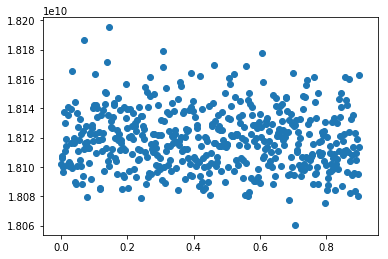

In [89]:
X = df.drop(columns='Unnamed: 0')

X.shape

import numpy as np
from sklearn.metrics import mean_squared_error


kf = KFold(n_splits=5,shuffle=True)

alphas = np.linspace(1e-9, 0.9, num=500)#np.linspace(0.0001, 0.1, num=150)
alphas_mses= []

for alpha in alphas:
    mse = []
    for train,test in kf.split(X):
        X_train=X.iloc[train]
        y_train=y.iloc[train]
        X_test=X.iloc[test]
        y_test=y.iloc[test]
        
        lassy = linear_model.Lasso(alpha=alpha)
        lassy.fit(X_train,y_train)
        y_pred = lassy.predict(X_test)
        mse_inst = mean_squared_error(y_pred,y_test)
        mse.append(mse_inst)
    #print("alpha:",alpha,"All MSEs:", mse)
    alphas_mses.append((alpha,sum(mse)/len(mse)))

print(alphas_mses)
    

import matplotlib.pyplot as plt

alpha_xaxis = [x[0] for x in alphas_mses]
mse_yaxis = [x[1] for x in alphas_mses]

plt.scatter(alpha_xaxis, mse_yaxis)
plt.show()
moo = '''
optimal_alpha = 0.017
lassy = linear_model.Lasso(alpha=optimal_alpha)
lassy.fit(X_train,y_train)

mse.append(lassy.score(X_test,y_test))
print("alpha:",alpha,"All MSEs:", mse)
print("avg MSE:", sum(mse)/len(mse))


# In[26]:


feat_coef = list(zip(X.columns,lassy.coef_))'''

In [84]:
np.logspace(-9, 1, num=100)

array([1.00000000e-09, 1.16711619e-09, 1.36216020e-09, 1.58979923e-09,
       1.85548042e-09, 2.16556124e-09, 2.52746159e-09, 2.94984134e-09,
       3.44280759e-09, 4.01815648e-09, 4.68965549e-09, 5.47337285e-09,
       6.38806207e-09, 7.45561067e-09, 8.70156393e-09, 1.01557362e-08,
       1.18529241e-08, 1.38337396e-08, 1.61455815e-08, 1.88437696e-08,
       2.19928686e-08, 2.56682330e-08, 2.99578103e-08, 3.49642455e-08,
       4.08073370e-08, 4.76269038e-08, 5.55861305e-08, 6.48754729e-08,
       7.57172149e-08, 8.83707874e-08, 1.03138977e-07, 1.20375170e-07,
       1.40491810e-07, 1.63970266e-07, 1.91372352e-07, 2.23353771e-07,
       2.60679802e-07, 3.04243618e-07, 3.55087652e-07, 4.14428548e-07,
       4.83686269e-07, 5.64518076e-07, 6.58858186e-07, 7.68964057e-07,
       8.97470401e-07, 1.04745224e-06, 1.22249846e-06, 1.42679775e-06,
       1.66523876e-06, 1.94352711e-06, 2.26832196e-06, 2.64739529e-06,
       3.08981791e-06, 3.60617651e-06, 4.20882699e-06, 4.91219013e-06,
      

### Ridge: idk

[(1e-09, 18092520740.610207), (0.0009009018998999, 18092732559.278877), (0.0018018027997997999, 18118423309.290443), (0.0027027036996997, 18094824103.183464), (0.0036036045995996, 18097045377.239326), (0.004504505499499501, 18100875894.335754), (0.0054054063993994005, 18079928370.966953), (0.0063063072992993, 18091805018.401337), (0.0072072081991992, 18122563855.47982), (0.0081081090990991, 18091480861.09951), (0.009009009998999, 18113537118.033867), (0.009909910898898899, 18147700425.32325), (0.0108108117987988, 18128503147.770985), (0.011711712698698699, 18117037214.27723), (0.0126126135985986, 18103756305.55116), (0.013513514498498498, 18136973787.204857), (0.0144144153983984, 18130881732.776627), (0.0153153162982983, 18124350217.881096), (0.0162162171981982, 18094419003.240078), (0.0171171180980981, 18116531487.577778), (0.018018018997998, 18139070951.65589), (0.018918919897897898, 18138942770.57345), (0.0198198207977978, 18152822295.314957), (0.0207207216976977, 18105246440.847588

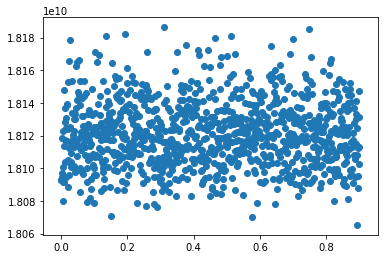

In [91]:
X = df.drop(columns='Unnamed: 0')

X.shape

import numpy as np
from sklearn.metrics import mean_squared_error


kf = KFold(n_splits=5,shuffle=True)

alphas = np.linspace(1e-9, 0.9, num=1000)#np.linspace(0.0001, 0.1, num=150)
alphas_mses= []

for alpha in alphas:
    mse = []
    for train,test in kf.split(X):
        X_train=X.iloc[train]
        y_train=y.iloc[train]
        X_test=X.iloc[test]
        y_test=y.iloc[test]
        
        lassy = linear_model.Ridge(alpha=alpha)
        lassy.fit(X_train,y_train)
        y_pred = lassy.predict(X_test)
        mse_inst = mean_squared_error(y_pred,y_test)
        mse.append(mse_inst)
    #print("alpha:",alpha,"All MSEs:", mse)
    alphas_mses.append((alpha,sum(mse)/len(mse)))

print(alphas_mses)
    

import matplotlib.pyplot as plt

alpha_xaxis = [x[0] for x in alphas_mses]
mse_yaxis = [x[1] for x in alphas_mses]

plt.scatter(alpha_xaxis, mse_yaxis)
plt.show()

1e-09
0.031034483724137932
0.062068966448275864
0.0931034491724138
0.12413793189655173
0.15517241462068967
0.1862068973448276
0.2172413800689655
0.24827586279310346
0.27931034551724143
0.3103448282413794
0.34137931096551727
0.3724137936896552
0.40344827641379316
0.43448275913793105
0.465517241862069
0.49655172458620694
0.5275862073103448
0.5586206900344828
0.5896551727586207
0.6206896554827587
0.6517241382068966
0.6827586209310345
0.7137931036551725
0.7448275863793103
0.7758620691034482
0.8068965518275862
0.8379310345517241
0.868965517275862
0.9
[(1e-09, 584246364331.8772), (0.031034483724137932, 188571748759.6468), (0.062068966448275864, 490532349284.35657), (0.0931034491724138, 293429150989.32214), (0.12413793189655173, 484492849865.82776), (0.15517241462068967, 263308427260.36783), (0.1862068973448276, 400356416622.07495), (0.2172413800689655, 365052850635.56396), (0.24827586279310346, 231640220945.53418), (0.27931034551724143, 289506356378.266), (0.3103448282413794, 382743955548.11

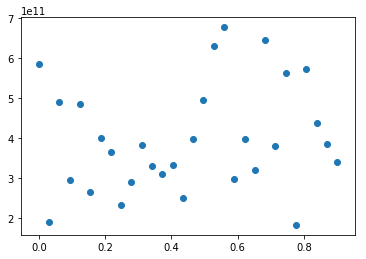

In [95]:
X = df.drop(columns='Unnamed: 0')

X.shape

import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

kf = KFold(n_splits=5,shuffle=True)

alphas = np.linspace(1e-9, 0.9, num=30)#np.linspace(0.0001, 0.1, num=150)
alphas_mses= []

for alpha in alphas:
    print(alpha)
    mse = []
    for train,test in kf.split(X):
        X_train=X.iloc[train]
        y_train=y.iloc[train]
        X_test=X.iloc[test]
        y_test=y.iloc[test]
        
        
        est = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
        est.fit(X_train, y_train)
        
        
        
        #lassy = linear_model.Ridge(alpha=alpha)
        #lassy.fit(X_train,y_train)
        y_pred = est.predict(X_test)
        mse_inst = mean_squared_error(y_pred,y_test)
        mse.append(mse_inst)
    #print("alpha:",alpha,"All MSEs:", mse)
    alphas_mses.append((alpha,sum(mse)/len(mse)))

print(alphas_mses)
    

import matplotlib.pyplot as plt

alpha_xaxis = [x[0] for x in alphas_mses]
mse_yaxis = [x[1] for x in alphas_mses]

plt.scatter(alpha_xaxis, mse_yaxis)
plt.show()

In [ ]:
from sklearn.linear_model import Ridge

coeffs
# Set up a figure and axes for 8 plots, 2 per row for 4 rows
fig, ax_rows = plt.subplots(20, 1, figsize=(15, 20))

# A helper function to plot the absolute value of the coefficients on the right-hand column plot
def plot_coefficients(est, ax, label=None, yscale='log'):
    coef = est.steps[-1][1].coef_.ravel()
    if yscale == 'log':
        ax.semilogy(np.abs(coef), marker='.', label=label)
        ax.set_ylim((1e-1, 1e8))
    else:
        ax.plot(np.abs(coef), marker='.', label=label)
    ax.set_ylabel('abs(coefficient)')
    ax.set_xlabel('coefficients')
    ax.set_xlim((1, 9))
    ax.set_ylim(-1000,1e6)

# Try out 4 different values of the RidgeRegression parameter alpha and watch how the resulting models change
# With higher values of alpha, more complex (more wiggly) models will be more punished and thus less likely
degree = 4
alphas = [0.0, 1e-8, 1e-5, 1]
for alpha, ax_row in zip(alphas, ax_rows):
    ax_left, ax_right = ax_row
    est = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
    est.fit(X_train, y_train)
    #plot_approximation(est, ax_left, label='alpha=%r' % alpha)
    plot_coefficients(est, ax_right, label='Ridge(alpha=%r) coefficients' % alpha)